In [3]:
import glob
import os
import shutil
import zipfile
import json
import csv

In [4]:
TMPDIR = 'tmp'
if os.path.exists(TMPDIR):
    shutil.rmtree(TMPDIR)

In [5]:
TMPDIR='tmp'

In [6]:
if not os.path.exists(TMPDIR):
    os.makedirs(TMPDIR)

In [7]:
tweetzipfiles = glob.glob('*zip')

In [8]:
tweetzipfiles

['@Puma_OR_@puma.zip', '@Adidas_OR_@adidas.zip', '@Nike_OR_@nike.zip']

In [9]:
for tweetzipfile in tweetzipfiles:
    with zipfile.ZipFile(tweetzipfile,'r') as f:
        print('Unzipping to tmp directory: %s' %tweetzipfile)
        f.extractall(TMPDIR)

Unzipping to tmp directory: @Puma_OR_@puma.zip
Unzipping to tmp directory: @Adidas_OR_@adidas.zip
Unzipping to tmp directory: @Nike_OR_@nike.zip


In [10]:
uniqueusers = {}
count = 0
for fn in os.listdir(TMPDIR):
    fn= os.path.join(TMPDIR,fn)
    with open(fn) as f:
        count+=1
        if count % 1000 == 0:
            print(count)
        tweetjson =json.load(f)
        text = tweetjson['text']
        language=tweetjson['metadata']['iso_language_code']
        if language == 'en':        
            followercount=tweetjson['user']['followers_count']
            if followercount>29:
                userwhotweeted = tweetjson['user']['screen_name']
                if userwhotweeted in uniqueusers:
                    uniqueusers[userwhotweeted]+=1
                if userwhotweeted not in uniqueusers:
                    uniqueusers[userwhotweeted]=1 

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000


In [11]:
len(uniqueusers)

17178

In [12]:
userstoinclude = set()
# a set is a unique list
usercount = 0
for auser in uniqueusers:
    if uniqueusers[auser] > 1: # if any user has more than 2 tweets
        usercount += 1
        userstoinclude.add(auser)
        
print(len(userstoinclude))

1130


In [13]:
edgelist = open('Apparel.edgelist.for.gephi.csv', 'w')
csvwriter = csv.writer(edgelist)
header = ['Source','Target']
csvwriter.writerow(header)

15

In [14]:
#open one tweetfile at a time, load the json into a dictionary tweetjson

print('Writing edge list')
count = 0
for fn in os.listdir(TMPDIR):
    fn = os.path.join(TMPDIR, fn) # Create complete filename and directory path for a tweet
    #print(fn) # list all tweets
    with open(fn) as f: # f = open(fn) open the file 
        tweetjson = json.load(f) # each tweet in json format is being loaded into a file called tweetjson
        userwhotweeted = tweetjson['user']['screen_name']
        if userwhotweeted in userstoinclude:
            count += 1
            if count % 1000 == 0:
                print(count)
# within the tweet, in the entities section, user_mentions field contains the entity that the current tweet mentions
            users = tweetjson['entities']['user_mentions']
            if len(users) > 0:
                for auser in users:
                    screenname = auser['screen_name']
                    row = [userwhotweeted, screenname]
                    csvwriter.writerow(row)
edgelist.close() #Always close the csv file that you write into

Writing edge list
1000
2000
3000


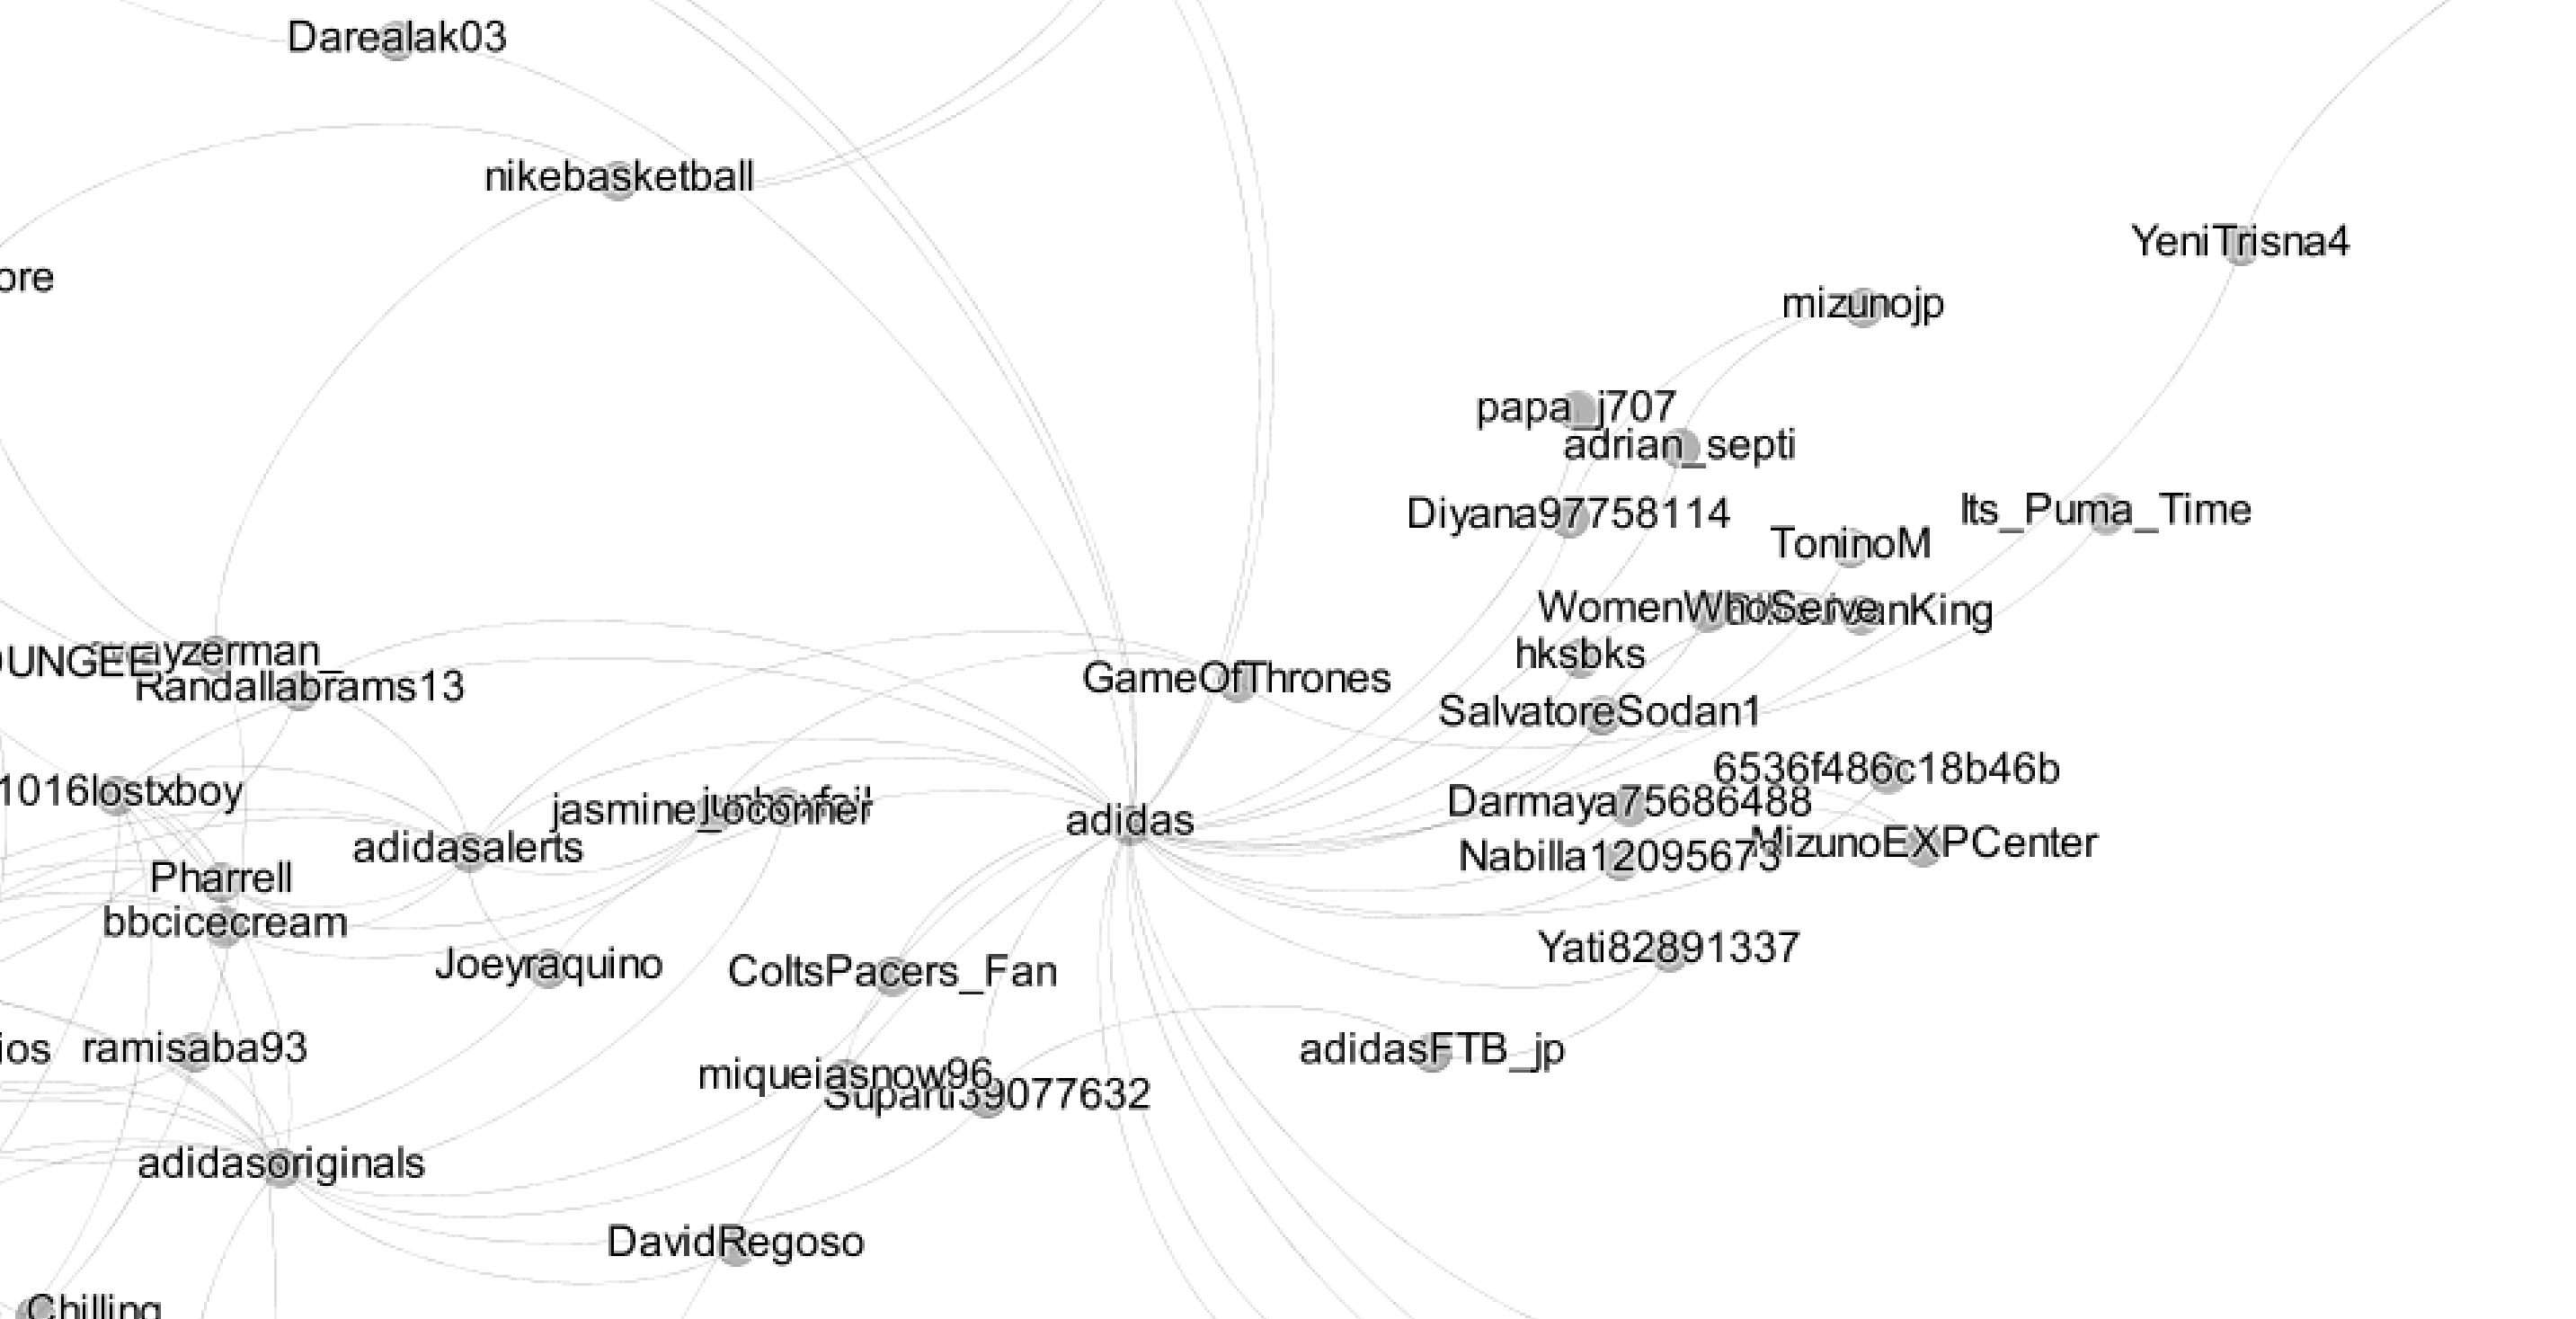

# Adidas Inferences

#### Game of Thrones: 
Adidas made the announcement in February that the sneaker brand was collaborating with "GOT" to produce six Ultra Boost 4.0 sneakers and the shoes were finally released early Friday morning. Each sneaker takes on a different element of the show, from "House Lannister," a glittering red shoe with gold stripes, to "White Walker," which resembles a block of ice with a transparent, icy blue and white exterior with black stripes.

#### ColtsPacers_Fans: 
Former Indiana Pacers star Chuck Person pleads guilty in the NCAA bribery scheme. Former Adidas AG executive James Gatto, agent Christian Dawkins and consultant Merl Code were convicted in October of funneling illicit payments to relatives of prospects and concealing them. Gatto was sentenced to nine months in prison earlier this month, while Code and Dawkins each received six months.

#### Adidas_FTB: 
This is Adidas football twitter handle.Since they are active contenders in the field of football and sponsor some of the stars like Lionel Messi, Paul Pogba,Toni Kroos etc.

#### DavidRegoso: 
David Regoso is a Los Angeles - based photographer whose work focuses on commercial street fashion and lifestyle photography. David has worked with various brands from local streetwear brands to global brands working with clothing to footwear. He has been working with Adidas from the start of 2019 as a professional photographer and he is a potential influencer with respect to Adidas streetwear apparel.

#### SalvatoreSodan1: 
He is Italian tennis enthusiasts who constantly tweets about vintage tennis shows and upcoming tournaments. He constantly retweets about Billie Jean King. Adidas unveils the special edition AM4BJK shoe. Created in honor of Billie Jean King's permanent footprint on the fabric of female sport, the AM4BJK is an homage to the iconic Adidas blue suede footwear Billie Jean King famously wore during her pivotal match 45 years ago.





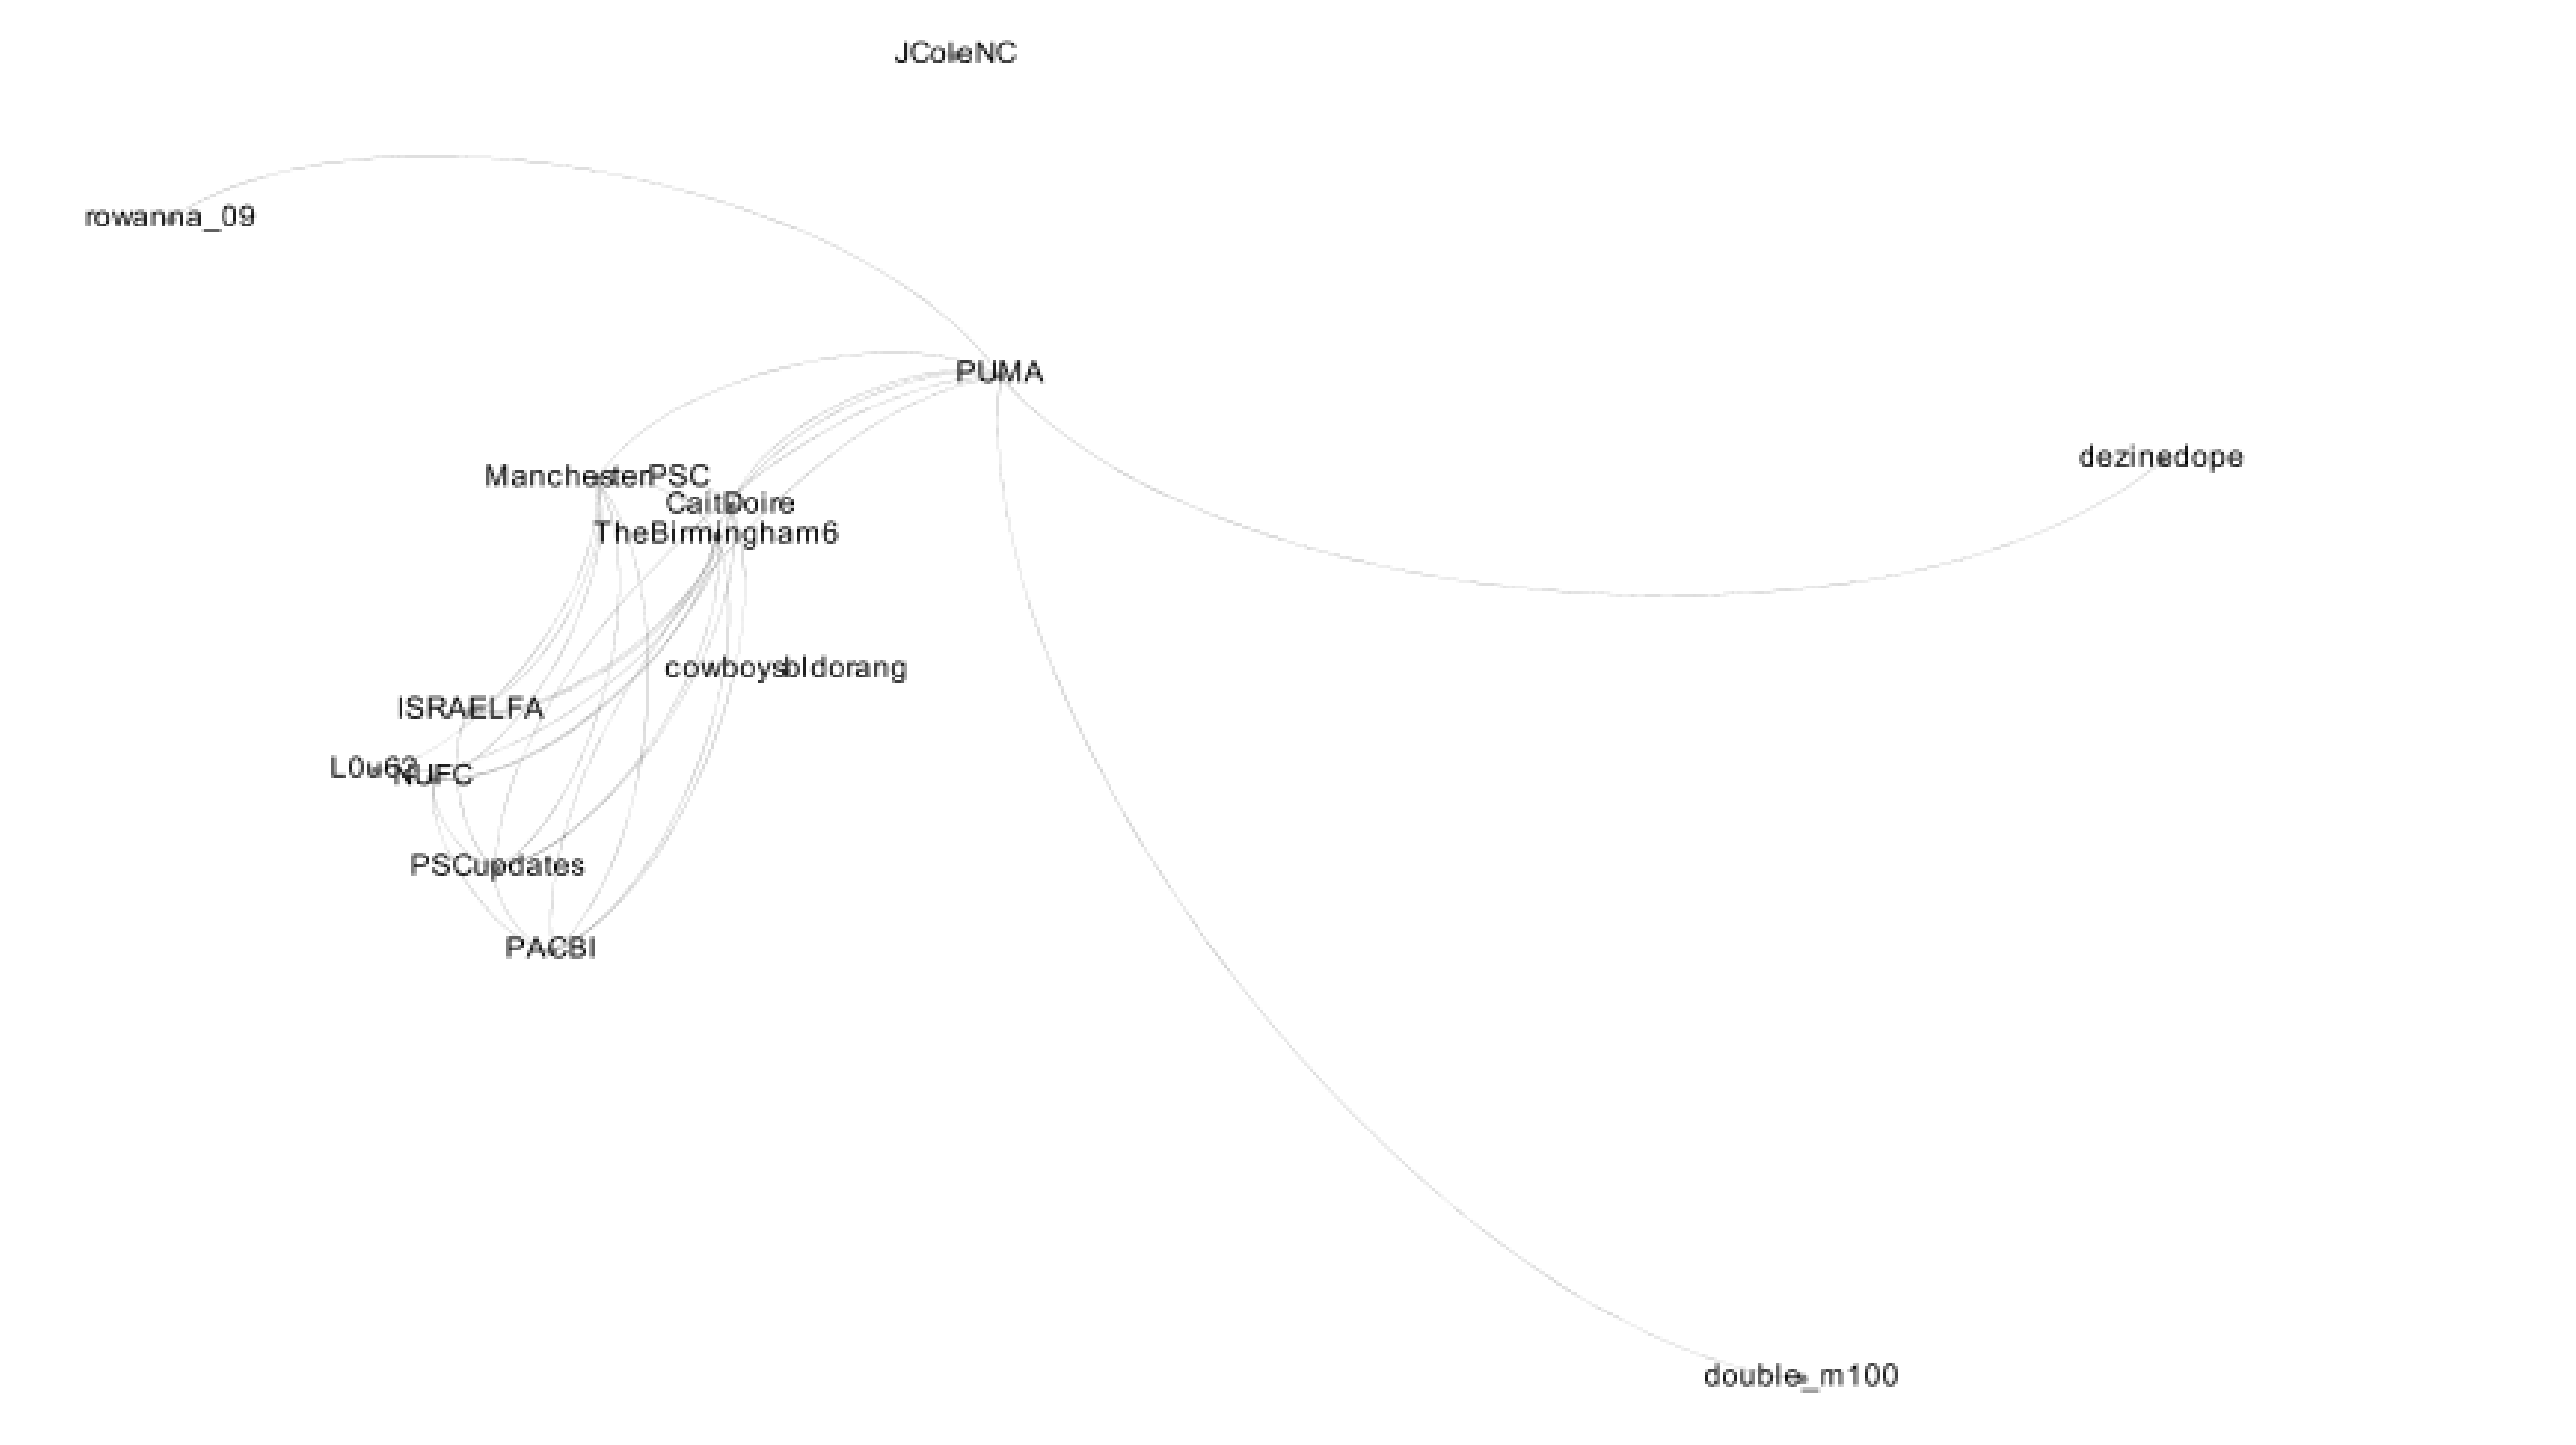

# Puma Inference

#### Rowanna_09: 
She is one famous social media person who is a big fan of the Toronto Maple Leafs and constantly tweets about them. Puma is the official kit sponsor of the Toronto Maple Leafs. She is a strong influencer since she has 5k followers and more than 45k tweets. So, it will be wise for Puma to use her as a channel to promote or talk about their apparel and stuff. 

#### DezineDope: 
DezineDope aka Paris Jordan is the dude who specializes in customizing the sneakers. He predominantly works on customizing Puma and Nike sneakers.

#### ManchesterPSC, Isreal FA, PSC updates: 
Manchester Palestine Action took action Sunday at the Puma department of Sports Direct to call for a global boycott of Puma for sponsoring the Israeli Football Association (IFA). Puma was involved in violations of international law and human rights. Puma is the main sponsor of the IFA, which includes teams in Israel’s illegal settlements on occupied Palestinian land.

#### Cowboysbldorang: 
Cowboys bleed orange is a twitter fan page for the Dallas Cowboys. Puma is the chief sponsor for the Dallas Cowboys. Recently the draft took place and there have been a lot of tweets regarding that in the twitter fan account.



In [15]:
import nltk
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
import glob
import os
import re

import shutil
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import csv
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
import string
import itertools
import zipfile
import json
punctuation = string.punctuation
stopwordsset = set(stopwords.words("english"))
stopwordsset.add("'s")

#Removing urls
def removeURL(text):
  result = re.sub(r"http\S+", "", text)
  return result

#Extracting contextual words from a sentence
# tokenizing is taking out all the words in a sentence and turning it into tokens/words
def tokenize(text):
  #lower case
  text = text.lower()
  #split into individual words
  words = word_tokenize(text)
  return words

#stem - peaches : peach : reduce the number of repeated words
def stem(tokenizedtext):
  rootwords = []
  for aword in tokenizedtext:
    aword = ps.stem(aword)
    rootwords.append(aword)
  return rootwords

#removes useless words such as a, an, the
def stopWords(tokenizedtext):
  goodwords = []
  for aword in tokenizedtext:
    if aword not in stopwordsset:
      goodwords.append(aword)
  return goodwords

# feature reduction. taking words and getting their roots and graphing only the root words
def lemmatizer(tokenizedtext):
  lemmawords = []
  for aword in tokenizedtext:
    aword = wn.lemmatize(aword)
    lemmawords.append(aword)
  return lemmawords

#inputs a list of tokens and returns a list of unpunctuated tokens/words
def removePunctuation(tokenizedtext):
  nopunctwords = []
  for aword in tokenizedtext:
    if aword not in punctuation:
      nopunctwords.append(aword)
  cleanedwords = []
  for aword in nopunctwords:
    aword = aword.translate(str.maketrans('', '', string.punctuation))
    cleanedwords.append(aword)
    
  return cleanedwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/srmu5708/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/srmu5708/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/srmu5708/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
TMPDIR = 'tmp'

In [17]:
if not os.path.exists(TMPDIR):
    os.makedirs(TMPDIR)

In [18]:
tweetzipfiles = glob.glob('*.zip')
# find all the zip files in the current folder and return the list of files

In [19]:

for tweetzipfile in tweetzipfiles:
    with zipfile.ZipFile(tweetzipfile, "r") as f:
        print("Unzipping to tmp directory: %s" %tweetzipfile)
        f.extractall(TMPDIR) # extracts each of the zip file into the temporary directory

Unzipping to tmp directory: @Puma_OR_@puma.zip
Unzipping to tmp directory: @Adidas_OR_@adidas.zip
Unzipping to tmp directory: @Nike_OR_@nike.zip


In [20]:
#shutil.rmtree(TMPDIR) #nuke the temp directory

In [21]:
#from time import sleep : remove this after unit testing 
uniquewords ={}
count = 0

for fn in os.listdir(TMPDIR):
    fn=os.path.join(TMPDIR,fn)
    with open(fn) as f:
        tweetjson=json.load(f)
        count+=1
        if count % 1000 == 0:
            print(count)
            
        text = tweetjson['text']
        lang1=tweetjson['lang']
        if lang1 == 'en':
            lang2=tweetjson['metadata']['iso_language_code']
            if lang2 == 'en':
                like_vote=tweetjson['favorite_count']
                if like_vote > 5:
                    nourlstext = removeURL(text)
                    tokanizetext=tokenize(nourlstext)
                    nostopwordstext=stopWords(tokanizetext)
                    lemmatizedtext=lemmatizer(nostopwordstext)
                    nopunctuationtext=removePunctuation(lemmatizedtext)

                    for aword in nopunctuationtext:
                        if aword in uniquewords:
                            uniquewords[aword] +=1
                        if aword not in uniquewords:
                            uniquewords[aword] =1

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000


In [22]:
#  list of unique words: key - word; value = number of times the word appears.
wordstoinclude = set()
wordcount = 0
for aword in uniquewords:
    if uniquewords[aword] > 5: # play with this number to get around 1000 words
        wordcount += 1
        wordstoinclude.add(aword)

In [23]:
print(wordcount)

158


In [24]:
edgelist = open('Apparel.semantic.edgelist.for.gephi.csv','w')
csvwriter = csv.writer(edgelist)

header = ['Source', 'Target', 'Type'] # add Type to mention this is undirected. in previous file, it was directed so didnt use it
csvwriter.writerow(header)

print('Writing Edge List')

uniquewords = {}
count = 0

#for a filename in TMPDIR
for fn in os.listdir(TMPDIR):
    fn=os.path.join(TMPDIR, fn)
    with open(fn) as f:
        tweetjson = json.load(f)
        count += 1
        if count % 1000 == 0:
            print(count)
        
        text = tweetjson['text']
        #natural language pre processing : clean the tweet 
        nourlstext = removeURL(text)
        tokenizedtext = tokenize(nourlstext)
        nostopwordstext = stopWords(tokenizedtext)
        lemmatizedtext = lemmatizer(nostopwordstext)
        nopuncttext = removePunctuation(lemmatizedtext)

        goodwords = []
        for aword in nopuncttext:
            if aword in wordstoinclude:
                goodwords.append(aword.replace(',', ''))
                
        allcombos = itertools.combinations(goodwords, 2) # set this to the number of words you want in each combination
        for acombo in allcombos:
            row = []
            for anode in acombo:
                row.append(anode)
            row.append('Undirected')
            csvwriter.writerow(row)

edgelist.close()

Writing Edge List
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000


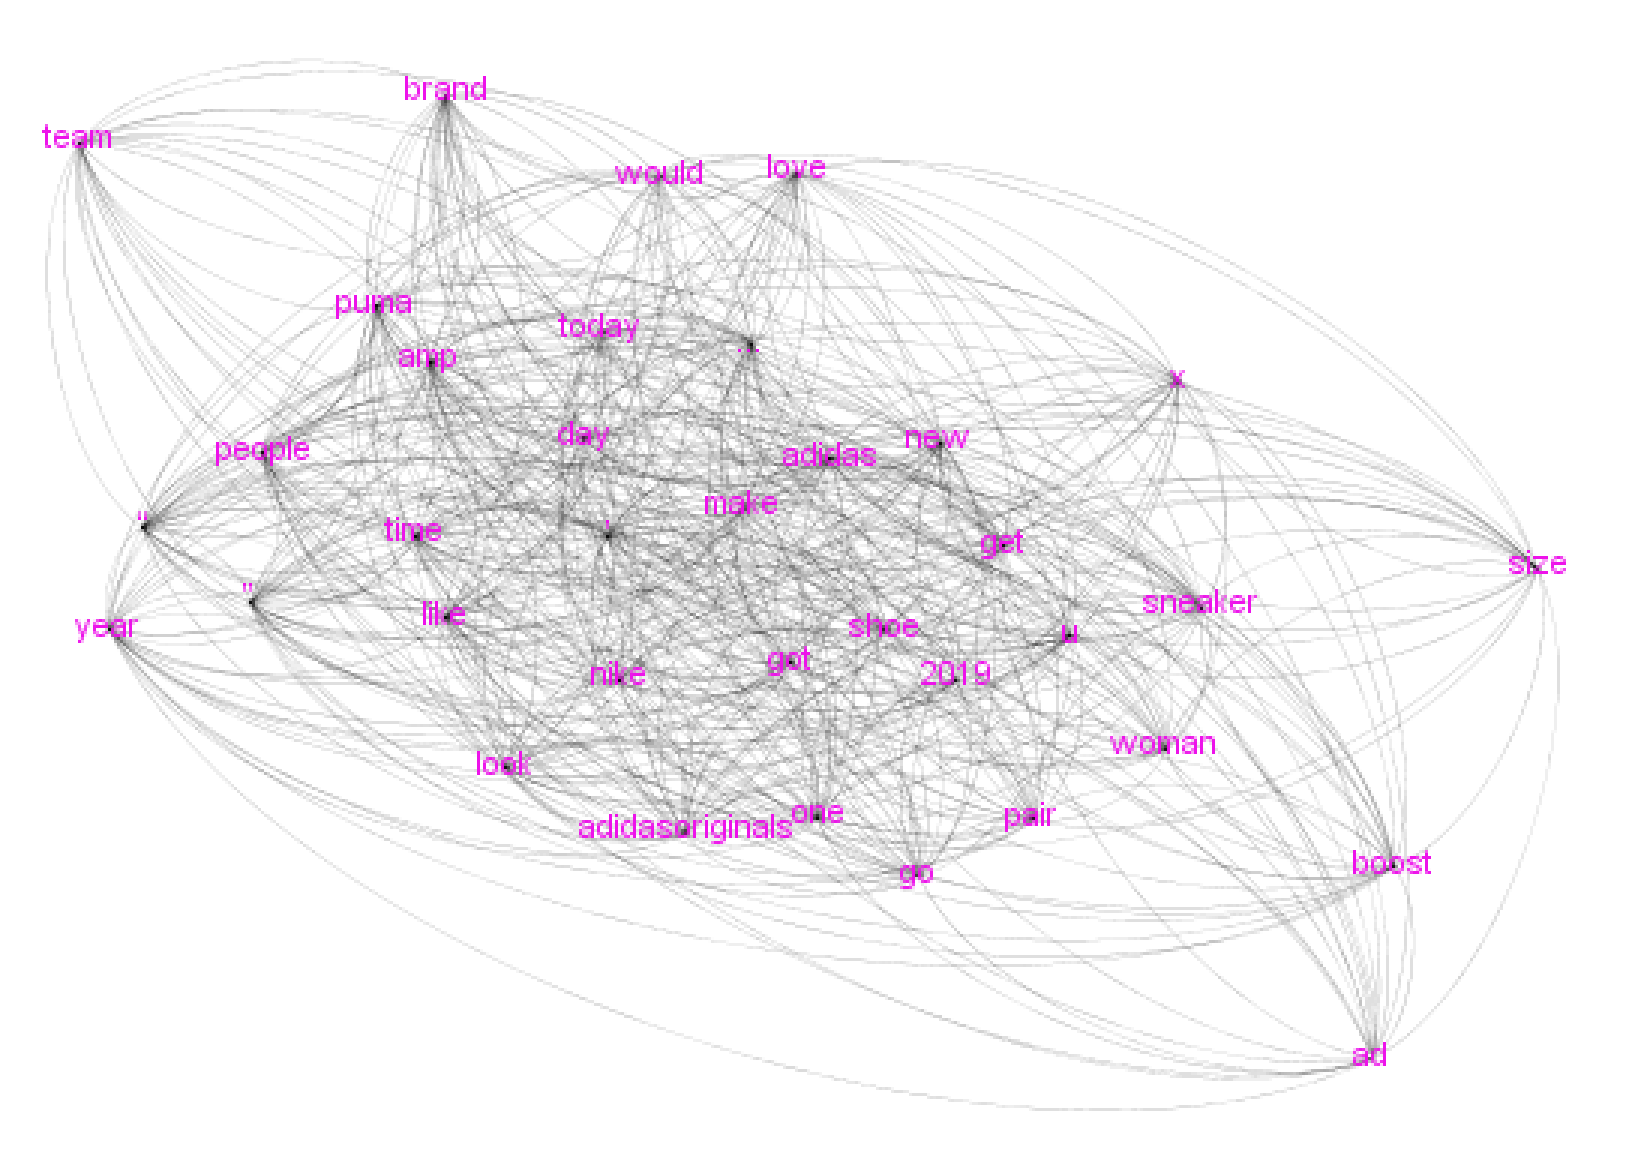

# Semantic Edgelist Inference:

## Adidas
You can see the words 'New','Boost', 'Shoe', 'Sneaker'' Love' being the most common words that are being associated with Adidas. Since Adidas has a separate category of shoes called as 'boost' and 'ultraboost', you can see those words being frequently use. The overall view about Adidas with respect to the common words is that it has a really good shoe and sneaker collection. You can also see 'Adidas Originals' a subsidiary of Adidas is being associated with the words like 'look','pair', 'one' and 'go'.

## Puma:
The most common words associated with the brand Puma are 'team','brand', 'amp', 'love', today' etc. These words explain their recent activities. If you consider the word 'AMP' you can see that Puma runs a separate category of women's sneaker called as 'AMP XT Womens Sneakers'.Puma is the leading sponsors of major football teams like Arsenal, BVB, AC Milan, etc. and due to this you can see the words team, love being associated with it.

## Nike:
The most common words associated with the brand Nike are 'time', 'women', 'like', 'sneaker' etc. Nike is one of the leading sports apparel in the USA and they have a larger collection with respect to sneakers. You can see the words sneaker being associated with them. Nike recently ran a special campaign on 'Women who serve' honoring the female athletes and sports personalities and that's why you can see the words 'women' strongly associated with them.

# Sentimental Analysis


In [25]:
from textblob import TextBlob

In [33]:
uniquewords ={}
count = 0
Adidas_score1=[]
Puma_score1=[]
Nike_score1=[]

for fn in os.listdir(TMPDIR):
    fn=os.path.join(TMPDIR,fn)
    with open(fn) as f:
        tweetjson=json.load(f)
        count+=1
#       if count % 1000 == 0:
#           print(count)
      
        text = tweetjson['text']
        lang1=tweetjson['lang']
        if lang1 == 'en':
            lang2=tweetjson['metadata']['iso_language_code']
            if lang2 == 'en':
                if '@adidas' in text:
                    sentimentscore = TextBlob(text).sentiment
                    score=sentimentscore.polarity  
                    Adidas_score1.append(score)
         
                elif '@PUMA' in text:
                    sentimentscore = TextBlob(text).sentiment
                    score=sentimentscore.polarity  
                    Puma_score1.append(score)
               
                elif '@Nike' in text:
                    sentimentscore = TextBlob(text).sentiment
                    score=sentimentscore.polarity  
                    Nike_score1.append(score)

print(len(Adidas_score1))                    
print(len(Puma_score1))
print(len(Nike_score1))
print(sum(Adidas_score1)/len(Adidas_score1))
print(sum(Puma_score1)/len(Puma_score1))
print(sum(Nike_score1)/len(Nike_score1))

6610
3028
9756
0.1378569634320633
0.10361947420355387
-0.4952740386581533


# Sentiment Analysis Score and Inferences

### Adidas total sentiment score:0.137

#### GOT sneakers
Adidas has a pretty good sentiment value of 0.137 since they had their shares of ups and down.The sneaker brand was collaborating with "GOT" to produce six Ultra Boost 4.0 sneakers and the shoes were finally released. 

#### Partnership with Beyonce 
Adidas and Beyonce announced their multi-layered partnership that will include inspiring and empowering the next generation of creators, driving positive change in the world through sport , and identifying new business opportunities.

### Puma total sentiment score:0.103

#### Back to Basketball
Puma had a score of 0.103 and some of the major factors were that last June, Puma decided to return to the basketball space after a 20-year hiatus. Rather than doing so quietly, the German-founded brand turned heads by making a series of splashy moves.

#### Isreal Issue
Manchester Palestine Action took action Sunday at the Puma department of Sports Direct to call for a global boycott of Puma for sponsoring the Israeli Football Association (IFA). Puma is involved in violations of international law and human rights. Puma is the main sponsor of the IFA, which includes teams in Israel’s illegal settlements on occupied Palestinian land.


### Nike total sentiment score: -0.495

#### Colin Kaepernick incident
Nike has a negative sentiment value because of the 'Colin Keapernick' incident that happened on Sept 4. The news of Kaepernick, who in 2016 decided not to stand for the national anthem to protest racial injustice, becoming the face of Nike marketing sparked some backlash from consumers on social media


# Using Spacey to get the adjectives

In [42]:
import spacy
#nlp = spacy.load('en')
count = 0

for fn in os.listdir(TMPDIR):
    fn=os.path.join(TMPDIR,fn)
    with open(fn) as f:
        tweetjson=json.load(f)
        count+=1
        if count % 1000 == 0:
           print(count)
      
        text = tweetjson['text']
        lang1=tweetjson['lang']
        if lang1 == 'en':
            lang2=tweetjson['metadata']['iso_language_code']
            if lang2 == 'en':
                doc = nlp(text)
                noun_adj_pairs = []
                for i,token in enumerate(doc):
                    if token.pos_ not in ('NOUN','PROPN'):
                        continue
                    for j in range(i+1,len(doc)):
                        if doc[j].pos_ == 'ADJ':
                            noun_adj_pairs.append((token,doc[j]))
                            print(token,doc[j])
                            break



RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
Sry busy
guys busy
RT long
RT sure
@theScore sure
RT crazy
@Nike crazy
RT new
@SInow new
RT crazy
@Nike crazy
RT crazy
@Nike crazy
workout new
product available
RT new
@SInow new
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT Palestinian
@bussola_d_oro Palestinian
Israel Palestinian
sport Palestinian
crimes Palestinian
steal spezial
Ux uxdesign
design uxdesign
inspiration uxdesign
@adidas uxdesign
@Behance uxdesign
https://t.co/0pjK8nxVEO uxdesign
RT crazy
@Nike crazy
@david_schwab Bold
@NickDePaula Bold
@Beyonce Bold
content emotive
RT crazy
@Nike crazy
RT universal
@LatuffCartoons universal
Companies universal
RT crazy
@Nike crazy
@JColeNC bigger
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT best
RT crazy
@Nike crazy
Companies universal
@gianmaster191 other
boost less
shoes less
m

RT crazy
@Nike crazy
RT Red
@EduardoHagn Red
😍 Red
|@adidas Red
shirt good
@arsenal next
shirt next
RT first
@Dreamville first
sponsors first
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT crazy
@Nike crazy
RT Palestinian
@L0u62 Palestinian
call Palestinian
athletes international
RT official
BREAKING official
@PremierLacrosse official
apparel multi
supplier multi
year biggest
deal biggest
@PaulRabil biggest
amp biggest
@MichaelRabil biggest
call biggest
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
equality Israeli
teams Palestinian
Dear full
pair full
NMDs full
way absolute
kits absolute
sauce purple
’s purple
RT crazy
@Nike crazy
RT oldest
Today oldest
DREAM able
life able
mass own
RT crazy
@Nike crazy
@Nike SNKRS
app absolute
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT great
@imVkohli great
potential great
RT crazy
@Nike crazy
sponsors Israeli
equality Israeli


RT second
@LewisHamilton second
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT boundless
@AshDykes boundless
WUJI boundless
limits boundless
records better
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
Israel Palestinian
sport Palestinian
crimes Palestinian
people https://t.co/bQzHQgXQtr
@ISRAELFA https://t.co/bQzHQgXQtr
teams https://t.co/bQzHQgXQtr
base https://t.co/bQzHQgXQtr
… https://t.co/bQzHQgXQtr
RT crazy
@Nike crazy
partners second
Tyshawn second
Jones second
Hardies second
RT crazy
@Nike crazy
RT new
@SInow new
RT new
@SInow new
RT second
@LewisHamilton second
RT official
Adidas official
shoe multi
apparel multi
supplier multi
PLL multi
RT former
@MichaelRabil former
months former
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT Good
@ImRo45 Good
times Excited
run good
@adidas good
RT crazy
@Nike crazy
RT crazy
@Nike crazy
today cant
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT oldest
Today oldest
DREAM able
life able
mass 

RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
QR fashionable
codes fashionable
RT crazy
@Nike crazy
RT Thrilled
@PremierLacrosse Thrilled
RT crazy
@Nike crazy
RT crazy
@Nike crazy
cam heavier
RT crazy
@Nike crazy
RT second
@LewisHamilton second
RT crazy
@Nike crazy
1000
RT sure
@theScore sure
RT blue
suede favorite
tennis favorite
shoes favorite
RT special
@_MrMcflyy special
home special
team special
one special
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT NEW
@2QueensInAPod NEW
_ NEW
EPISODE personal
✅ personal
Meeting personal
@PatMcgrathel personal
amp personal
✅ personal
Drake personal
amp personal
Men personal
’s personal
RT responsive
Ultraboost responsive
shoe more
% more
RT second
@LewisHamilton second
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT Palestinian
@CaitDoire Palestinian
Israel Palestinian
sport Palestinian

RT Thrilled
@PremierLacrosse Thrilled
RT crazy
@Nike crazy
RT crazy
@Nike crazy
@Drapes fresh
@UnderArmour fresh
can fresh
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT Palestinian
@PACBI Palestinian
Former Palestinian
Barcelona Palestinian
player Palestinian
Oleguer Palestinian
Presas Palestinian
teams Israeli
@Puma Israeli
sponsorship Israeli
teams illegal
RT second
@LewisHamilton second
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT original
@DjMarley954 original
music original
RT current
@ProSportsExtra current
@ManUtd current
title current
thanks current
dollar current
deal current
Liverpool current
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT biggest
@ProSportsExtra biggest
@PremierLacrosse biggest
stripes biggest
checks biggest
RT sustainable
@AllBlacks sustainable
🙌 sustainable
@Adidas sustainable
RT crazy
@Nike crazy
😭 @Arsenal
baby ready
OnceAlways ready
today ready
RT crazy
@Nike crazy
RT crazy


RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT Israeli
@ALQadiPAL Israeli
Boycott Israeli
@double_m100 twin
RT crazy
@Nike crazy
RT Last
@DJOMINAYA Last
RT Palestinian
@PACBI Palestinian
Reds Palestinian
Women Palestinian
’s Palestinian
Rugby Palestinian
Team Palestinian
Rome Palestinian
Italy Palestinian
call Palestinian
RT crazy
@Nike crazy
@PACBI nazi
Jews nazi
RT crazy
@Nike crazy
RT Former
@PACBI Former
RT available
@adidasalerts available
Sizes available
RT crazy
@Nike crazy
RT Former
@PACBI Former
RT new
@SInow new
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
@LatuffCartoons wonderful
BDS wonderful
RT Former
@PACBI Former
RT international
@PSCupdates international
UN international
RT crazy
@Nike crazy
RT second
@LewisHamilton second
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT 

RT crazy
@Nike crazy
RT universal
@SaolDara universal
equality Israeli
teams Palestinian
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
@PACBI international
Support international
RT crazy
@Nike crazy
RT @JColeNC
@ComplexSneakers @JColeNC
@Amy_muirr fancy
@adidas fancy
@adidasUK fancy
@themynolo hard
@adidas tough
jersey tough
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT crazy
@Nike crazy
RT crazy
@Nike crazy
worker response.#PayOurRight
shoes response.#PayOurRight
@adidas response.#PayOurRight
dismissed,7 response.#PayOurRight
years response.#PayOurRight
self intentional
RT crazy
@Nike crazy
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT crazy
@Nike crazy
RT new
@SInow new
RT crazy
@Nike crazy
RT crazy
@Nike crazy
Compani

Yep reverse
Adidas reverse
OWNS reverse
Reebok reverse
RT crazy
@Nike crazy
@PatrickMahomes endorsment
hand endorsment
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT available
@adidasalerts available
Sizes available
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT Outstanding
@winsorharmon Outstanding
@Maxwell36231275 Aggressive
@TaylorCusack17 Aggressive
RT crazy
@Nike crazy
Congrats inaugural
@PremierLacrosse inaugural
RT crazy
@Nike crazy
@User07757067 mad
@MaxPowers3k lame
@ComplexSneakers lame
@JColeNC lame
check lame
sponsors Israeli
apartheid https://t.co/TWuQRGA2eQ
people https://t.co/TWuQRGA2eQ
conscience https://t.co/TWuQRGA2eQ
choice https://t.co/TWuQRGA2eQ
RT new
@SInow new
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT Former
@PACBI Former
ICYMI available
RT authentic
@CONIFAGenSec authentic
@eBayAU authentic
% authentic
RT crazy
@Nike crazy
RT Good
@ImRo45 Good
times Excited
run good
@adidas good
RT crazy
@Nike crazy


RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT Playful
style Serious
RT crazy
@Nike crazy
RT New
Boogie/@PUMA @Oaklandish
collab available
Shirt available
RT crazy
@Nike crazy
RT new
@SInow new
RT crazy
@Nike crazy
RT crazy
@Nike crazy
queue long
RT crazy
@Nike crazy
RT first
@Dreamville first
sponsors first
RT crazy
@Nike crazy
RT amazing
today amazing
experience whole
RT crazy
@Nike crazy
RT busy
@SafeKeyP1 busy
morning other
Amazon other
£ other
month other
Supplier other
pieces other
month other
RT Live
@Footaction Live
classic High
Suede High
Classic High
RT crazy
@Nike crazy
RT creative
@BeyLegion creative
Beyoncé creative
Beyoncé creative
partner new
brand new
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT new
@SInow new
RT Palestinian
@L0u62 Palestinian
call Palestinian
athletes international
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT second
@LewisHamilton second
RT new
@SInow new
RT crazy
@Nike crazy
@Puma aware
Israel electoral
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy

RT amazing
@SneakerAnnexe amazing
Tags amazing
torsion integral
@EduardoHagn @Arsenal
@Officialelsamo @Arsenal
Clueless arsenal
RT Palestinian
@PACBI Palestinian
boot Palestinian
call Palestinian
RT third
@iRunFar third
Tom third
Evans third
Lake pre
Sonoma pre
Mile pre
interview LS
# LS
RT blue
suede favorite
tennis favorite
shoes favorite
RT crazy
@Nike crazy
RT crazy
@Nike crazy
Yesssssssss intercollegiate
pair intercollegiate
Israel Palestinian
sport Palestinian
crimes Palestinian
@PremierLacrosse biggest
stripes biggest
checks biggest
RT Less
visibility ’re
Twitter female
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT international
@CaitDoire international
@ISRAELFA international
law Palestinian
teams Palestinian
RT new
@SInow new
RT crazy
@Nike crazy
RT crazy
@Nike crazy
thing scared
RT crazy
@Nike crazy
RT new
@SInow new
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT 

RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT first
@PhilaUnion first
April first
RT first
@Dreamville first
sponsors first
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT amazing
@CharlizeAfrica amazing
props other
norm other
RT crazy
@Nike crazy
RT new
@SInow new
RT crazy
@Nike crazy
@adidasUS 3/30/19
@PatrickMahomes5 3/30/19
@adidasFballUS 3/30/19
Purchased 3/30/19
baseball 3/30/19
RT crazy
@Nike crazy
couple hard
pairs hard
leggings hard
Ya hard
cellulite hard
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT joint
🔥 @Oaklandish
🔥 @Oaklandish
🔥 @Oaklandish
@PUMAHoops @Oaklandish
RT crazy
@Nike crazy
RT responsive
Ultraboost responsive
shoe more
% more
RT crazy
@Nike crazy
Israel illegal
Football illegal
Association illegal
IFA illegal
@GameOfThrones Awesome
NightsWatch Awesome
Ultraboost Awesome
mail Awesome
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT sure
@theScore sure
RT #
@TechCircleIndia #
Watch #
Puma

RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT Israeli
@PACBI Israeli
Reminder Israeli
UN Israeli
Day Israeli
Sport Israeli
Peace Israeli
snipers Palestinian
careers Palestinian
% more
purchase more
RT blue
suede favorite
tennis favorite
shoes favorite
equality Israeli
teams Palestinian
CHANGES few
basketball few
tournament few
RT crazy
@Nike crazy
RT new
@SInow new
RT crazy
@Nike crazy
RT Palestinian
@TheBirmingham6 Palestinian
Israel Palestinian
sport Palestinian
crimes Palestinian
RT crazy
@Nike crazy
RT new
@SInow new
RT universal
@CaitDoire universal
BoycottPUMA universal
@PUMA universal
RT sure
@theScore sure
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT sure
@theScore sure
RT crazy
@Nike crazy
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT Former
@PACBI 

spirit high
week high
son high
’s high
RT crazy
@Nike crazy
RT new
@SInow new
equality Israeli
teams Palestinian
@Nike much
golf last
year Long
RT second
@LewisHamilton second
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT such
nextgen such
football such
helmet such
w/ such
@RiddellSports such
@Carbon such
brands such
@adidas @La
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT German
@ClarekNickolas German
reality German
agreement German
component diverse
RT crazy
@Nike crazy
RT crazy
@Nike crazy
Form First
amp First
Function First
Unveils First
RT loud
@Barbie loud
retro loud
logos loud
pops latest
color latest
throwback latest
vibes latest
RT crazy
@Nike crazy
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT crazy
@Nike crazy
Apartheid boycottpuma
# boycottpuma
ApartheidIsrael boycottpuma
FreePalestine boycottpuma
BDS boycottpuma
RT second
@LewisHamilton second
RT crazy
@Nike crazy
RT crazy
@Nike c

RT crazy
@Nike crazy
RT crazy
@Nike crazy
@HoustonRockets special
@FootDistrict nice
RT second
@LewisHamilton second
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT top
dance top
crews top
SOMETHING top
WATER top
choreographer present
@Cristiano right
@Nike right
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT Good
@ImRo45 Good
times Excited
run good
@adidas good
RT Thrilled
@PremierLacrosse Thrilled
RT crazy
@Nike crazy
RT crazy
@Nike crazy
Adidas great
“ absolute
Boost absolute
RT crazy
@Nike crazy
RT Amazing
@Nike 15th
ad 15th
Tiger 15th
Woods 15th
jacket iconic
equality Israeli
teams Palestinian
RT crazy
@Nike crazy
@TigerWoods ready
Nike ready
shadows ready
putt ready
Yall ready
RT crazy
@Nike crazy
RT second
@LewisHamilton second
RT new
@SInow new
RT crazy
@Nike crazy
RT crazy
@Nike crazy
vision new
🤩 new
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
@KxngSxmbv next
@TeamJColeNC next
@JColeNC next
Meek next
RT crazy
@Nike crazy
RT crazy
@Nike crazy

ultraboosts great
pair great
i5923s great
RT official
BREAKING official
@PremierLacrosse official
apparel multi
supplier multi
year biggest
deal biggest
@PaulRabil biggest
amp biggest
@MichaelRabil biggest
call biggest
RT crazy
@Nike crazy
poorquality #
RT Happy
@BCE3Wilson Happy
@PUMA sickest
Yall sickest
RT new
@SInow new
@TigerWoods sudden
Hmmm sudden
republicans sudden
individual-1 sudden
WH sudden
guys good
RT special
@_MrMcflyy special
home special
team special
one special
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT favorite
@NomzamoMbatha favorite
RT crazy
@Nike crazy
poster high
wall high
RT crazy
@Nike crazy
RT new
@SInow new
RT crazy
@Nike crazy
Nipsey great
shoe great
everyone great
respects great
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@BeWarmers crazy
dream 👏
@TigerWoods 👏
@Nike 👏
👏 👏
👏 👏
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
percent sure
RT crazy
@Nike crazy
RT #
GRLPWR ava

RT crazy
@Nike crazy
RT crazy
@Nike crazy
sneakers #
WUJI boundless
limits boundless
records better
RT favorite
@NomzamoMbatha favorite
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT favorite
@NomzamoMbatha favorite
RT crazy
@Nike crazy
RT crazy
@Nike crazy
@JessMolina justified
equality Israeli
teams Palestinian
RT https://t.co/JHF8SpHdfZ
@adidasalerts https://t.co/JHF8SpHdfZ
US https://t.co/JHF8SpHdfZ
YEEZY https://t.co/JHF8SpHdfZ
DESERT https://t.co/JHF8SpHdfZ
BOOT https://t.co/JHF8SpHdfZ
ROCK https://t.co/JHF8SpHdfZ
RT Israeli
@PACBI Israeli
Reminder Israeli
UN Israeli
Day Israeli
Sport Israeli
Peace Israeli
snipers Palestinian
careers Palestinian
RT Hey
@clegfx Hey
guys new
collabo available
@PlayApex available
RT last
HUGE last
everyone last
weekend possible
RT crazy
@Nike crazy
equality Israeli
teams Palestinian
RT Good
@ImRo45 Good
times Excited
run good
@adidas good
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy


Dame nice
Black nice
Panther nice
colorway nice
RT crazy
@Nike crazy
RT international
@PSCupdates international
UN international
RT Former
@PACBI Former
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT nite
honor nite
@adidasoriginals nite
joggers nite
today nite
@adidas nite
RT new
@SInow new
world impossible
wear impossible
monkeys impossible
dogs impossible
😂 impossible
😂 impossible
😂 impossible
😂 impossible
😂 impossible
😂 impossible
😂 impossible
OOTD happy
Sunday happy
Monday happy
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT new
@SInow new
RT Red
@EduardoHagn Red
😍 Red
|@adidas Red
shirt good
@arsenal next
shirt next
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT amazing
today amazing
experience whole
RT new
@aarondee new
_ new
trey new
RT crazy
@Nike crazy
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortb

RT universal
@LatuffCartoons universal
Companies universal
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT blue
suede favorite
tennis favorite
shoes favorite
RT crazy
@Nike crazy
RT Palestinian
@L0u62 Palestinian
call Palestinian
athletes international
RT crazy
@Nike crazy
RT new
@SInow new
RT crazy
@Nike crazy
RT second
@LewisHamilton second
RT big
@johndecafee big
@RapidsRPD big
@HolidayInn big
RT crazy
@Nike crazy
@Ashrafkasirye bro
@PUMA bro
RT Former
@PACBI Former
RT crazy
@Nike crazy
RT crazy
@Nike crazy
Hewitts Fantastic
range Fantastic
RT crazy
@Nike crazy
RT available
@adidasalerts available
RT crazy
@Nike crazy
RT classic
@HYPEBEAST classic
court https://t.co/uLeUYlUsbY
style https://t.co/uLeUYlUsbY
RT Good
@ImRo45 Good
times Excited
run good
@adidas good
RT new
@SInow new
@TigerWoods Funny
tiger Funny
allegations Funny
RT crazy
@Nike crazy
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT

RT crazy
@Nike crazy
RT Palestinian
@PACBI Palestinian
Today Palestinian
UN Palestinian
Day Palestinian
Sport Palestinian
Development Palestinian
Peace Palestinian
RT crazy
@Nike crazy
RT second
@LewisHamilton second
Thnx comfortable
ones comfortable
vintage fashionblogger
RT crazy
@Nike crazy
RT crazy
@Nike crazy
@UnitedStandMUFC united
Adidas united
RT crazy
@Nike crazy
ICYMI https://t.co/FRmOoZaMVD
April https://t.co/FRmOoZaMVD
research https://t.co/FRmOoZaMVD
@Nike https://t.co/FRmOoZaMVD
girls https://t.co/FRmOoZaMVD
sport https://t.co/FRmOoZaMVD
experience https://t.co/FRmOoZaMVD
RT international
@ISRAELFA international
law Palestinian
teams Palestinian
RT new
@SInow new
RT crazy
@Nike crazy
RT crazy
@Nike crazy
spring new
blazer new
henley new
combo new
@Wild_Bill_OU happy
@Nike happy
RT crazy
@Nike crazy
RT LEAK
RT first
@Dreamville first
sponsors first
RT crazy
@Nike crazy
RT international
@PSCupdates international
@ISRAELFA international
law Palestinian
teams Palestinian
land

RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT Good
@ImRo45 Good
times Excited
run good
@adidas good
RT blue
suede favorite
tennis favorite
shoes favorite
RT Unlock
_ Unlock
game Unlock
RT new
@SInow new
RT crazy
@Nike crazy
RT Israeli
@PACBI Israeli
Reminder Israeli
UN Israeli
Day Israeli
Sport Israeli
Peace Israeli
snipers Palestinian
careers Palestinian
RT crazy
@Nike crazy
shoe red
week red
RT crazy
@Nike crazy
@Jessicae13Eaton running
RT crazy
@Nike crazy
RT Equal
pay equal
RT fun
@NomzamoMbatha fun
’s fun
idea fun
table fun
😛 fun
😎 fun
@PUMASouthAfrica fun
RT Unlock
_ Unlock
game Unlock
RT universal
@LatuffCartoons universal
Companies universal
RT Thrilled
@PremierLacrosse Thrilled
RT second
@LewisHamilton second
RT crazy
@Nike crazy
RT Thrilled
@PremierLacrosse Thrilled
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT new
@SInow new
RT digital
@PremierLacrosse digital
“ digital
PLL digital
@SonnySosa5 own
@L0u62 own
@ManCity own
Manchester own
City own
RT bold
Con

RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
@PaulRabil Full
@MichaelRabil Full
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
@varunshetty front
sticker best
RT legendary
Gert finest
Thys finest
RT Palestinian
@PACBI Palestinian
boot Palestinian
call Palestinian
RT Emotional
RT Palestinian
@L0u62 Palestinian
call Palestinian
athletes international
RT crazy
@Nike crazy
RT @AdidasFetish
@We_arethechaps @AdidasFetish
RT crazy
@Nike crazy
logo indie
shirt indie
cap indie
sneaker indie
RT crazy
@Nike crazy
@popovic_elena successful
@sc0ttser successful
Ivy successful
Park successful
RT crazy
@Nike crazy
RT crazy
@Nike crazy
@_MeghanAnne vulgar
Gambino vulgar
music vulgar
blacks oth
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT Israeli
@GazaAI1 Israeli
time Israeli
RT second
@LewisHamilton second
RT crazy
@Nike crazy
RT new
@SInow new
RT new
@novy_williams new
league new
players new
@Adidas new
’s new
RT sure
@dinsmoreinc sure
partners sure
@Carbon sure
Addi

@issacluke_14 blue
@PUMA blue
RT crazy
@Nike crazy
RT few
years amazing
designs bright
imagery bright
’s bright
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT official
Adidas official
shoe multi
apparel multi
supplier multi
PLL multi
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT awesome
@stunad620 awesome
@RapidsRPD awesome
Time Crypto
RT crazy
@Nike crazy
YAS amazing
Samantha amazing
% testimonial
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT Palestinian
@L0u62 Palestinian
call Palestinian
athletes international
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT Palestinian
@L0u62 Palestinian
call Palestinian
athletes international
RT international
@PSCupdates international
UN international
RT crazy
@Nike crazy
RT crazy
@Nike crazy
Iron 🚀
Man 🚀
@GameOfThrones white
Anyone white
RT crazy
@Nike crazy
RT Former
@PACBI Former
RT Good
@ImRo45 Good
times Excited
run good
@adidas good
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nik

RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT great
@imVkohli great
potential great
equality Israeli
teams Palestinian
RT crazy
@Nike crazy
RT Former
@PACBI Former
RT crazy
@Nike crazy
@OhItsTeddy 🏽‍
morning 🏽‍
shit 🏽‍
brotha 🏽‍
RT crazy
@Nike crazy
RT new
@SInow new
RT crazy
@Nike crazy
RT https://t.co/BH6Gcb0BFt
@adidasalerts https://t.co/BH6Gcb0BFt
today https://t.co/BH6Gcb0BFt
US https://t.co/BH6Gcb0BFt
adidas https://t.co/BH6Gcb0BFt
Nite https://t.co/BH6Gcb0BFt
Jogger https://t.co/BH6Gcb0BFt
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT Viral
@OliverTwst Viral
_ Viral
Everybody Viral
🤦 Viral
♂ Viral
️ Viral
🛩 Viral
🎒 Viral
🏾 Viral
Vc Viral
@TyroneHenryy Viral
ViralVideos Viral
RT new
@SInow new
RT crazy
@Nike crazy
@TKbreezy long
year long
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT DARETOCREATE
fakers DARETOCREATE
creators DARETOCREATE
️ DARETOCREATE
🔥 DARETOCREATE
💫 DARETOCREATE
RT crazy
@Nike crazy
RT crazy
@Nike cra

RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT second
@LewisHamilton second
RT great
@osamudiamien great
Nipsey great
shoe great
everyone great
respects great
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
@jim_jamis cool
@espn cool
@PatrickMahomes cool
’s cool
RT new
@SInow new
RT few
years amazing
designs bright
imagery bright
’s bright
review bad
RT great
@imVkohli great
potential great
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT Former
@PACBI Former
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT 🚫
passion 🚫
N 🚫
rise legislative
RT available
@Blom4Sure available
@PUMASouthAfrica available
@pumafootball available
@Masandawana available
merchandise available
RT minimal
@varunshetty minimal
willow minimal
hero minimal
@JemiRodrigues minimal
RT crazy
@Nike crazy
RT second
@LewisHamilton second
RT new
@SInow new
RT high
@fashion_n

RT crazy
@Nike crazy
@SneakerAnnexe Integral
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT international
@PSCupdates international
@ISRAELFA international
law Palestinian
teams Palestinian
land stat
@Puma stat
RT first
@imVkohli first
% first
classic first
% first
Basket first
Classic first
one8 first
today first
😇 first
@KimKardashian first
@adidasUS first
@FedEx first
@FedExHelp first
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT second
@LewisHamilton second
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT universal
@shy_guava universal
Companies universal
RT thin
bags thin
squad thin
game next
RT crazy
@Nike crazy
Faith dead
action dead
RT second
@LewisHamilton second
players new
equipment cheerful
RT official
@IL_Gear official
footwear multi
apparel multi
partner multi
part multi
RT crazy
@Nike crazy
deal bruv
month bruv
rent bruv
rent new
money new
RT crazy
@Nike crazy
RT crazy
@Nike crazy
@Kuahmel ridiculous
shoes ridiculous
man ridiculous
kind ridiculous
SHOE ridi

RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
@DesignWeekPDX great
start 1st
time own
RT new
@SInow new
RT Thrilled
@PremierLacrosse Thrilled
RT crazy
@Nike crazy
RT crazy
@Nike crazy
equality Israeli
teams Palestinian
RT crazy
@Nike crazy
RT difficult
@Manangoi_Junior difficult
things difficult
RT crazy
@Nike crazy
RT first
@Dreamville first
sponsors first
RT international
@PSCupdates international
UN international
RT Former
@PACBI Former
RT 📸
@fortemodelmgmt 📸
Global 📸
campaign 📸
RT international
@PSCupdates international
UN international
RT crazy
@Nike crazy
RT Israeli
@GazaAI1 Israeli
time Israeli
laborer responsible
@adidas responsible
shoes responsible
years responsible
adidas responsible
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT second
@LewisHamilton second
RT universal
@PSCupdates universal
equality Israeli
teams Palestinian
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT new
@S

RT amazing
@ErezRM amazing
Congrats amazing
friends amazing
achievement Former
@Reebok Israeli
Execs Israeli
Partner Israeli
@TigerWoods true
RT crazy
@Nike crazy
someone first
RT genocidal
@Tequilaleela1 genocidal
Boycott genocidal
ties genocidal
@JHarden13 online
anyone online
friend online
problems online
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT New
@Knightsbridge_E New
beat New
RT wet
@TripleJumpThias wet
conditions good
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT original
’s original
Recode original
RT ready
@FootDistrict ready
Nite ready
Jogger ready
BOOST ready
Thursday ready
colorways reflective
runner reflective
RT crazy
@Nike crazy
response terrible
customer terrible
service terrible
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT big
Opening big
Day big
Trails big
April big
spring big
celebration big
trail big
hit winni
swing winni
RT crazy
@Nike crazy
@Beyonce more
followers more
Instagram more
’s more
RT few
years amazing
designs

RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT new
@SInow new
y’ right
@NipseyHussle right
collabs right
RT crazy
@Nike crazy
RT official
Adidas official
shoe multi
apparel multi
supplier multi
PLL multi
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT Israeli
@PACBI Israeli
Reminder Israeli
UN Israeli
Day Israeli
Sport Israeli
Peace Israeli
snipers Palestinian
careers Palestinian
@Nike few
RT crazy
@Nike crazy
kicks same
day same
@swiftwicksocks same
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT puma
@PUMAConnaughtPlace puma
@pumaindia puma
store puma
manager puma
Connaught rude
Place rude
Mr. rude
Amit rude
Kumar rude
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT Palestinian
@PACBI Palestinian
Reds Palestinian
Women Palestinian
’s Palestinian
Rugby Palestinian
Team Palestinian
Rome Palestinian
Italy Palestinian
call Palestinian
@_just_Ed Same
RT Former
@PACBI Former
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT second
@LewisHamilt

RT crazy
@Nike crazy
RT favorite
@NomzamoMbatha favorite
@The5thFloor zesty
custom zesty
adistar zesty
kit zesty
citrusfade zesty
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT official
BREAKING official
@PremierLacrosse official
apparel multi
supplier multi
year biggest
deal biggest
@PaulRabil biggest
amp biggest
@MichaelRabil biggest
call biggest
RT crazy
@Nike crazy
@gofundme more
Flint more
brand new
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT new
@SInow new
RT Thrilled
@PremierLacrosse Thrilled
’s last
April last
20th last
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT New
@adidasalerts New
@Lamar2n phill
@Nike phill
RT sure
@theScore sure
RT international
@PSCupdates international
@ISRAELFA international
law Palestinian
teams Palestinian
land stat
@Puma stat
RT crazy
@Nike crazy
RT few
years amazing
designs bright
imagery bright
’s bright
RT crazy
@Nike crazy
RT inter

RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT favorite
@NomzamoMbatha favorite
RT crazy
@Nike crazy
@AndrewSiwicki awesome
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT green
@GOLF_com green
Giveaway green
⁣⁣ green
⁣⁣In green
pursuit green
jacket green
Rickie green
Dear best
friend old
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
@Nike skip
RT crazy
@Nike crazy
@AndrewSiwicki cute
RT crazy
@Nike crazy
RT available
@adidasalerts available
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
@MeekMill fake
NONE fake
Nipsey fake
RT crazy
@Nike crazy
RT crazy
@Nike crazy
@Amy_muirr Brilliant
@adidas Brilliant
@adidasUK Brilliant
style strong
images strong
@Nike strong
promo strong
emails strong
RT crazy
@Nike crazy
RT Palestinian
@allan_crawshaw Palestinian
Israel Palestinian
sport Palestinian
crimes Palestinian
RT crazy
@Nike crazy
RT crazy
@Nike crazy
@Reebok diverse
team diverse
RT crazy

RT international
@PSCupdates international
UN international
RT second
@LewisHamilton second
@SabriyyahAD international
@ISRAELFA international
law Palestinian
teams Palestinian
RT crazy
@Nike crazy
RT Happy
@Arabelladaho Happy
Wednesday new
fit much
amp much
@FilaUK much
😍 much
thanks much
RT crazy
@Nike crazy
RT responsive
Ultraboost responsive
shoe more
% more
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT crazy
@Nike crazy
RT straight
@bwill2502 straight
yeezys straight
people straight
RT second
@LewisHamilton second
RT universal
@OscarBergamin universal
equality Israeli
teams Palestinian
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT international
@PSCupdates international
UN international
Beyoncé creative
▪ creative
️ creative
Multi creative
Layered creative
deal creative
▪ c

RT crazy
@Nike crazy
sneakers familiar
birthday familiar
👀 nice
🙌 nice
🏼 nice
RT crazy
@Nike crazy
RT official
BREAKING official
@PremierLacrosse official
apparel multi
supplier multi
year biggest
deal biggest
@PaulRabil biggest
amp biggest
@MichaelRabil biggest
call biggest
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT available
@adidasalerts available
@FinishLine UltraBOOST
@GameOfThrones UltraBOOST
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT Thrilled
@PremierLacrosse Thrilled
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT available
@adidasalerts available
RT crazy
@Nike crazy
level crippled
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT crazy
@Nike crazy
RT https://t.co/ESxDdgmMFL
@adidasalerts https://t.co/ESxDdgmMFL
Select https://t.co/ESxDdgmMFL
sizes https://t.co/ESxDdgmMFL
US https://t.co/ESxDdgmMFL
Ultra https://

RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT blue
suede favorite
tennis favorite
shoes favorite
RT crazy
@Nike crazy
RT new
@HYPEBEAST new
RT indepe
@PLamRecruiting indepe
Invitational indepe
17s indepe
Pool indepe
@1FamilyHoops indepe
Beyonce new
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT Partial
@PUMA Partial
creep Partial
RT crazy
@Nike crazy
@Gooberstatus same
@__kimberlin102 same
@NickDePaula same
@Reebok same
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT new
@SInow new
RT crazy
@Nike crazy
RT hacking
@TheEpicZay hacking
link more
anyone more
RT boundless
@AshDykes boundless
WUJI boundless
limits boundless
records better
RT crazy
@Nike crazy
RT second
@LewisHamilton second
RT Sustainable
@DavidBOlsenPR Sustainable
@TigerWoods bald
Tiger bald
Rogaine bald
spot https://t.co/O5xFoalh3s
fortune 

RT crazy
@Nike crazy
RT crazy
@Nike crazy
@KimKardashian much
RT second
@LewisHamilton second
RT second
@LewisHamilton second
RT universal
@PSCupdates universal
equality Israeli
teams Palestinian
RT second
@LewisHamilton second
RT Available
@PUMA Available
movements Available
style Available
@Selenagomez Available
DEFY Available
Mid Available
news HUGE
Dear HUGE
@Nike HUGE
@ISRAELFA international
law Palestinian
teams Palestinian
RT first
@Dreamville first
sponsors first
manufacturers softball
ladies softball
baseball softball
RT crazy
@Nike crazy
RT crazy
@Nike crazy
brand local
RT international
@PSCupdates international
UN international
RT second
@LewisHamilton second
RT autographed
@selenagomez autographed
pair autographed
DEFY autographed
sneakers autographed
RT new
@SInow new
RT beautiful
@JabariJacobs beautiful
life beautiful
amp Happy
eyes Happy
moment Happy
RT second
@LewisHamilton second
RT Palestinian
@L0u62 Palestinian
call Palestinian
athletes international
RT major
@Sean_A

RT rare
@CorkCityFC rare
chance rare
off rare
RT crazy
@BeWarmers crazy
dream 👏
@TigerWoods 👏
@Nike 👏
👏 👏
👏 👏
RT Former
@PACBI Former
RT new
@SInow new
month better
son better
’s better
shoes better
RT new
@SInow new
equality Israeli
teams Palestinian
RT crazy
@Nike crazy
RT available
@adidasalerts available
RT new
@SInow new
RT powerful
@cdixon25 powerful
RT top
dance top
crews top
SOMETHING top
WATER top
choreographer present
RT LEAK
RT Ready
RT crazy
@Nike crazy
@Nike Equal
Randy “
Quaid “
’s “
dickey “
push “
movement “
opening “
RT particular
@isarqureshi particular
details particular
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT international
@PSCupdates international
@ISRAELFA international
law Palestinian
teams Palestinian
land stat
@Puma stat
RT crazy
@Nike crazy
RT new
@SInow new
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy

RT second
@LewisHamilton second
RT second
@LewisHamilton second
equality Israeli
teams Palestinian
RT crazy
@Nike crazy
RT new
@ComplexStyle new
Ivy new
Park new
deal creative
RT international
Israel international
Football international
Assocation(IFA international
law Palestinian
teams Palestinian
RT crazy
@Nike crazy
RT crazy
@Nike crazy
Beyhive new
@Beyonce new
’s new
RT ready
@FootDistrict ready
Nite ready
Jogger ready
BOOST ready
Thursday ready
colorways reflective
runner reflective
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT official
Adidas official
shoe multi
apparel multi
supplier multi
PLL multi
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
@GameOfThrones white
God white
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT @JColeNC
@ComplexSneakers @JColeNC
RT crazy
@Ni

@MLSTransfers More
boot illegal
Puma illegal
teams illegal
settlements Palestinian
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
@Adidas strong
partnership strong
@Beyonce strong
Instagram strong
followers strong
influencer https://t.co/HEkrjLhzgd
m https://t.co/HEkrjLhzgd
RT crazy
@Nike crazy
RT exclusive
LQD exclusive
CELL exclusive
Origin exclusive
AR exclusive
app exclusive
filters Available
shoes Available
RT crazy
@Nike crazy
shoes comfortable
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT Former
@PACBI Former
RT crazy
@Nike crazy
RT Ready
@Decathlon best
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT ready
@FootDistrict ready
Nite ready
Jogger ready
BOOST ready
Thursday ready
colorways reflective
runner reflective
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT comfortbale
@AndrewSiwicki comfortbale
video comfort

RT fye‼️
@OglesbyPayne fye‼️
day fye‼️
@1jamesbanks fye‼️
jersey fye‼️
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
Non -
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT universal
@TheBirmingham6 universal
Companies universal
RT top
dance top
crews top
SOMETHING top
WATER top
choreographer present
RT available
@adidasalerts available
movies last
“ last
US last
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT international
@PSCupdates international
UN international
RT crazy
@Nike crazy
RT meaningless
@robbystarbuck meaningless
Story meaningless
RT crazy
@Nike crazy
@adidas @KimKardashian
RT crazy
@Nike crazy
RT Palestinian
@L0u62 Palestinian
call Palestinian
athletes international
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
@30for30 first
STILL first
Tiger first
Woods first
@Nike first
version first
@TigerWoods first
Billie long
pair long
Palm long
Springs long
Y’all online
someone o

RT crazy
@Nike crazy
reasons amazing
Stripe amazing
Life amazing
# amazing
Recycle amazing
@healthy_mouse more
you.i great
form great
Ipl great
RT Thrilled
@PremierLacrosse Thrilled
rest reflective
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT responsive
Ultraboost responsive
shoe more
% more
RT second
@LewisHamilton second
RT crazy
@Nike crazy
RT underway
@techUK underway
Day underway
CTHB19 underway
Alliance underway
RT crazy
@Nike crazy
RT French
@sindhicrawford French
retailer largest
@Decathlon largest
India largest
retailer more
@XiaomiIndia more
equality Israeli
teams Palestinian
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT amazing
today amazing
experience whole
RT new
@SInow new
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT @JColeNC
@ComplexSneakers @JColeNC
RT crazy
@Nike crazy
RT Palestinian
@PACBI Palestinian
Reds Palestinian
Women Palestinian
’s Palestinian
Rugby Palestinian
Team Palestinian
Rome Pales

RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT crazy
@Nike crazy
RT available
@adidasalerts available
Sizes available
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT loud
@Barbie loud
retro loud
logos loud
pops latest
color latest
throwback latest
vibes latest
RT crazy
@Nike crazy
RT proud
sponsors Israeli
@adidas brief
ad brief
’s brief
moment perfect
picture perfect
RT Palestinian
@L0u62 Palestinian
call Palestinian
athletes international
laces Ignite
shoes comfortable
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT illegal
@PACBI illegal
sponsors illegal
teams illegal
settlements natural
Palestinians natural
land natural
amp natural
RT international
@PSCupdates international
UN international
RT https://t.co/h1HBHfDGIK
@adidasalerts https://t.co/h1HBHfDGIK
Select https://t.co/h1HBHfDGIK
sizes https://t.co/h1HBHfDGIK
US https://t.co/h1HBHfDGIK
@Pharrell https://t.co/h1HBHfDGIK
Hu https://t.co/h1HBHfDGIK
Holi https://t.

RT blue
suede favorite
tennis favorite
shoes favorite
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT first
@Dreamville first
sponsors first
peek upcoming
@donaldglover upcoming
’s upcoming
@Tkwondo_T Dear
thousands British
amp Non
Muslims ZioNazi
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT first
@Dreamville first
sponsors first
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT original
@vivekkatiyar008 original
challenge original
u original
RT proud
sponsors Israeli
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT Thrilled
@PremierLacrosse Thrilled
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT new
@JonCruz91 new
Nite new
Jogger new
laborer poor
amp poor
RT crazy
@Nike crazy
RT Palestinian
@L0u62 Palestinian
call Palestinian
athletes international
RT international
@PSCupdates international
UN international
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track co

@itsAndrewBrown mad
dis mad
RT crazy
@Nike crazy
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT sneakerdesign
Adidas sneakerdesign
Convo sneakerdesign
sneaker sneakerdesign
backpack sneakerdesign
design sneakerdesign
# sneakerdesign
nicekicks sneakerdesign
# sneakerdesign
nicekicks sneakerdesign
# sneakerdesign
sneakerhead sneakerdesign
runner #
Day everyday
imma key
Persistence key
y’ busy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT universal
@PSCupdates universal
equality Israeli
teams Palestinian
RT crazy
@Nike crazy
RT former
@MichaelRabil former
months former
RT crazy
@Nike crazy
RT ready
@FootDistrict ready
Nite ready
Jogger ready
BOOST ready
Thursday ready
colorways reflective
runner reflective
RT crazy
@Nike crazy
RT GOLDEN
@FIFAWorldCup GOLDEN
BREAKING GOLDEN
BALL Golden
Lionel Golden
Messi Golden
RT crazy
@Nike crazy
@pecan39 “
@PUMA “
apparel lovely
week lovely
’s lovely
RT crazy
@

RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT crazy
@Nike crazy
@RyanOliver17 unacceptable
man ultra
pairs ultra
boost Embarrassing
RT crazy
@Nike crazy
Companies universal
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
yeezys straight
people straight
draft new
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
@LewisHamilton right
@PUMA right
@TravisSheridan fun
@Pharrell fun
Oooh fun
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT multi
@ComplexMusic multi
Beyoncé multi
▪ multi
Roots sure
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT Good
@ImRo45 Good
times Excited
run good
@adidas good
RT Palestinian
@PACBI Palestinian
Former Palestinian
Barcelona Palestinian
player Palestinian
Oleguer Palestinian
Presas Palestinian
teams Israeli
@Puma Israeli
sponsorship Israeli
teams illegal
RT crazy
Capolavoro crazy
@Nike crazy
TigerWoods

RT crazy
@Nike crazy
RT crazy
@Nike crazy
equality Israeli
teams Palestinian
RT universal
@PSCThailand universal
equality Israeli
teams Palestinian
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
summer new
term new
today new
’s new
sneak new
peak new
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
Xperience biggest
Xperience Big
Hear Big
Stefan Big
Baas Big
Senior Big
Director Big
RT crazy
@Nike crazy
shoe excellent
RT meaningless
@robbystarbuck meaningless
Story meaningless
RT blue
suede favorite
tennis favorite
shoes favorite
RT official
Adidas official
shoe multi
apparel multi
supplier multi
PLL multi
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
स्टाइल #
दोनों #
में #
है #
दम‼️ #
TeamIndia #
🇮 #
boxer #
World #
# #
🥊 #
Champion #
RT crazy
@Nike crazy
BTS 12th
comeback 12th
RT Palestinian
@PACBI Palestinian
Former Palestinian
Barcelona Palestinian
player Palesti

RT few
years amazing
designs bright
imagery bright
’s bright
RT new
@SInow new
@SneakerAdmirals unattainable
Same unattainable
RT crazy
@Nike crazy
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT crazy
@Nike crazy
RT commendable
Nike commendable
sign commendable
michael commendable
endorsement commendable
deal commendable
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT crazy
@Nike crazy
RT sustainable
@AllBlacks sustainable
🙌 sustainable
@Adidas sustainable
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
’s 1st
MSUskylinersSZN 1st
’s 1st
RT crazy
@Nike crazy
penny Clean
look comfortable
RT special
@_MrMcflyy special
home special
team special
one special
RT excite
@spring_io excite
RT crazy
@Nike crazy
RT Delighted
@gembon23 Delighted
family exciting
times pumafootball
@pumafootball pumafootball
# pumafootball
RT loooong
RT Former
@PACBI Former
RT crazy
@Nike crazy
RT cra

RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
@2 fancy
K fancy
@GearboxOfficial fancy
@DuvalMagic fancy
guys fancy
RT crazy
@Nike crazy
ADIDAS https://t.co/ao4NvenPKv
BEYONCÉ https://t.co/ao4NvenPKv
ANNOUNCE https://t.co/ao4NvenPKv
ICONIC https://t.co/ao4NvenPKv
PARTNERSHIP https://t.co/ao4NvenPKv
.@Beyonce https://t.co/ao4NvenPKv
RT Former
@PACBI Former
RT new
@SInow new
@brianmoore666 Good
@Nike Good
image aime
whch aime
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
@PSCupdates universal
Companies universal
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
@FUNimation closest
@ToeiAnimation closest
RT second
@LewisHamilton second
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT new
@SInow new
_ same
@Nike same
Bingo same
RT crazy
@Nike crazy
RT crazy
@Nike crazy
sponsors Israeli
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT cra

RT amazing
@A_nisa_i_am amazing
thenitefactory amazing
artists More
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT new
@SInow new
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT much
@double_m100 much
@mariamad97 much
@PUMA much
RT crazy
@Nike crazy
RT crazy
@Nike crazy
@starwart1 better
@BenBrien better
_ better
Adidas better
lfc better
thinking better
RT new
@SInow new
RT Unlock
_ Unlock
game Unlock
RT crazy
@Nike crazy
RT new
@SInow new
RT crazy
@Nike crazy
RT cultural
@AshDykes cultural
difference cultural
diversity collective
RT special
@_MrMcflyy special
home special
team special
one special
@PetrCech Israeli
@issacluke_14 new
@PUMA new
@pumafootball new
Sarrrlid new
tomorrow new
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT second
@LewisHamilton second
RT Equal
pay equal
RT crazy
@Nike crazy
RT second
@LewisHamilton second
RT cr

RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
New #
strategy #
amp #
plan #
RT crazy
@Nike crazy
RT Palestinian
@PACBI Palestinian
Former Palestinian
Barcelona Palestinian
player Palestinian
Oleguer Palestinian
Presas Palestinian
teams Israeli
@Puma Israeli
sponsorship Israeli
teams illegal
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT Former
@PACBI Former
RT best
@kfreberg best
question best
@kev_berg best
💯 best
🙌 best
🏻 best
➖ best
@Cinnabon best
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT multi
@ComplexMusic multi
Beyoncé multi
▪ multi
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT new
@SInow new
RT ready
@FootDistrict ready
Nite ready
Jogger ready
BOOST ready
Thursday ready
colorways reflective
runner reflective
RT straight
@bwill2502 straight
yeezys straight
people straight
RT Unlock
_ Unlock
game Unlock
RT Proud
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT boycottpuma
@oneforsorrow87 boycot

RT illegal
@PACBI illegal
sponsors illegal
teams illegal
settlements natural
Palestinians natural
land natural
amp natural
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
🏎 exclusive
names exclusive
retailer uniform
RT international
@PSCupdates international
@ISRAELFA international
law Palestinian
teams Palestinian
land stat
@Puma stat
RT crazy
@Nike crazy
women better
colorways better
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT second
@LewisHamilton second
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT crazy
@Nike crazy
🔥 clean
🔥 clean
RT crazy
@Nike crazy
RT #
@BrynSutherland #
@Nike #
wtf #
@MichaelVick #
Time #
RT Israeli
@ALQadiPAL Israeli
Boycott Israeli
RT second
@LewisHamilton second
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy


RT great
@imVkohli great
potential great
impossibilities luminous
God luminous
future luminous
RT proud
@CaitDoire proud
sponsors Israeli
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT new
@SInow new
RT crazy
@Nike crazy
RT Last
@thomeography Last
KICKIN new
BACK new
Beyonce new
RT third
@iRunFar third
Tom third
Evans third
Lake pre
Sonoma pre
Mile pre
interview LS
# LS
RT crazy
@Nike crazy
RT international
@PSCupdates international
@ISRAELFA international
law Palestinian
teams Palestinian
land stat
@Puma stat
RT new
@SInow new
RT crazy
@Nike crazy
@UnderArmour good
@Nike good
RT responsive
Ultraboost responsive
shoe more
% more
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
@Nike entire
@NorthCentralWo1 sure
@JeffAthletics sure
RT official
BREAKING official
@PremierLacrosse official
apparel multi
supplier multi
year biggest
deal biggest
@PaulRabil biggest
amp biggest
@MichaelRabil biggest
call biggest
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT craz

RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT digital
@PremierLacrosse digital
“ digital
PLL digital
Beyonce valuable
deal valuable
rejection valuable
# token
branding token
lesson token
Diversity token
RT crazy
@Nike crazy
@new_engine SURE
SAM SURE
MUCH SURE
TODAY SURE
@adidas SURE
DAY SURE
RT crazy
@Nike crazy
RT international
Israel international
Football international
Assocation(IFA international
law Palestinian
teams Palestinian
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT crazy
@Nike crazy
RT new
@SInow new
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT new
@SInow new
RT international
@PSCupdates international
UN international
RT international
Israel international
Football international
Assocation(IFA international
law Palestinian
teams Palestinian
RT crazy
@Nike crazy
RT comfortbale
@AndrewSiwicki comfortbale
vide

RT crazy
@Nike crazy
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
17000
roots Red
RT crazy
@Nike crazy
headquarters former
children former
lack former
professionalism former
RT Palestinian
@PACBI Palestinian
Former Palestinian
Barcelona Palestinian
player Palestinian
Oleguer Palestinian
Presas Palestinian
teams Israeli
@Puma Israeli
sponsorship Israeli
teams illegal
RT available
@adidasalerts available
US https://t.co/unlTNkE283
adidas https://t.co/unlTNkE283
Nite https://t.co/unlTNkE283
Jogger https://t.co/unlTNkE283
https://t.co/TImZi8FV8J https://t.co/unlTNkE283
ad https://t.co/unlTNkE283
RT crazy
@Nike crazy
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT crazy
@Nike crazy
RT crazy
@Nike crazy
@TigerWoods crazy
women right
RT Thrilled
@PremierLacrosse Thrilled
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT special
@_MrMcflyy special
home spec

RT high
@BrightonBDS high
Manchester high
crew high
campaign high
RT crazy
@Nike crazy
RT crazy
@Nike crazy
laborer poor
amp poor
working https://t.co/Ex1PX7xswX
conditions https://t.co/Ex1PX7xswX
July https://t.co/Ex1PX7xswX
strike https://t.co/Ex1PX7xswX
… https://t.co/Ex1PX7xswX
@ESPNcricinfo memorable
@varunshetty memorable
@graynics memorable
Oval memorable
Australia memorable
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT Palestinian
@L0u62 Palestinian
call Palestinian
athletes international
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
y’ aquarium
volunteer great
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT Thrilled
@PremierLacrosse Thrilled
@93_bq Arabic
puma Arabic
name Arabic
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
Puma strong
career professional
opportunities professional
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT first
@Dreamville first
sponsors first


contract own
Puma own
RT crazy
@Nike crazy
RT universal
@PSCupdates universal
equality Israeli
teams Palestinian
RT blue
suede favorite
tennis favorite
shoes favorite
RT crazy
@Nike crazy
RT Israeli
time Israeli
RT crazy
@Nike crazy
RT new
@SInow new
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
sizes weird
app weird
Tiger more
woods more
@Nike more
’s more
marketing more
personnel more
RT crazy
@Nike crazy
RT second
@LewisHamilton second
@cyril_irl kind
@SnoopDogg kind
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT sure
@theScore sure
RT NEW
@2QueensInAPod NEW
_ NEW
EPISODE personal
✅ personal
Meeting personal
@PatMcgrathel personal
amp personal
✅ personal
Drake personal
amp personal
Men personal
’s personal
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@BeWarmers crazy
dream 👏
@TigerWoods 👏
@Nike 👏
👏 👏
👏 👏
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT Happy
@43einhalb Happy
adidas new
Four new
Twenty ne

RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT crazy
@Nike crazy
moment tight
’s tight
Hypervenoms tight
years tight
year tight
’s tight
model tight
bit tight
partnership sure
Nip sure
RT crazy
@Nike crazy
RT crazy
@Nike crazy
money new
brand new
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT Palestinian
@PACBI Palestinian
boot Palestinian
call Palestinian
RT crazy
@Nike crazy
RT crazy
@Nike crazy
@MichaelRabil great
Congratulations great
Mike great
RT international
@PSCupdates international
UN international
RT crazy
@Nike crazy
April cool
Fools cool
joke cool
everything cool
retro cool
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT new
@SInow new
spring new
colourways new
RT crazy
@Nike crazy
RT iconic
@RetailDive iconic
@TigerWoods amazing
# amazing
RT crazy
@Nike crazy
@jeffrey_salia Fresh
RT crazy
@Nike crazy
18000
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT comfortbale
@

RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT Israeli
@PACBI Israeli
Reminder Israeli
UN Israeli
Day Israeli
Sport Israeli
Peace Israeli
snipers Palestinian
careers Palestinian
RT Palestinian
@L0u62 Palestinian
call Palestinian
athletes international
retro good
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
Shoes ugly
RT international
Israel international
Football international
Assocation(IFA international
law Palestinian
teams Palestinian
RT international
@PSCupdates international
UN international
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT Palestinian
@L0u62 Palestinian
call Palestinian
athletes international
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT New
season New
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
@LewisHamilton lean


RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
Teams available
Parleys available
pair ultra
@adidas ultra
Game ultra
Thrones ultra
RT crazy
@Nike crazy
RT available
@adidasalerts available
RT crazy
@Nike crazy
RT available
@adidasalerts available
@gigi030308 top
@MichaelAvenatti top
@Nike top
James top
Gatto top
Merl top
Code top
Christian top
Dawkins top
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT Palestinian
@L0u62 Palestinian
call Palestinian
athletes international
Emergency 1st
loan 1st
Exeter 1st
City 1st
@AndrewSiwicki least
@adidasoriginals least
@adidasLA least
RT crazy
@Nike crazy
footwear reliable
football reliable
boots reliable
RT crazy
@Nike crazy
RT international
@PSCupdates international
UN international
RT crazy
@Nike crazy
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT crazy
@Nike crazy
🏼 interesting
body very
types very
@S_C new
_ new
@LF

RT crazy
@Nike crazy
RT second
@berrics second
partners second
Tyshawn second
Jones second
Hardies second
RT new
@SInow new
RT international
@ISRAELFA international
law Palestinian
teams Palestinian
HUGE last
everyone last
weekend possible
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT international
@PSCupdates international
UN international
Women black
’s black
pair black
pink af5143
RT crazy
@Nike crazy
RT crazy
@Nike crazy
YZY new
DSRT new
BT new
OIL new
shoe available
RT blue
suede favorite
tennis favorite
shoes favorite
RT robust
Digital robust
technologies robust
supply robust
chain robust
RT crazy
@Nike crazy
service worst
PUMA worst
India worst
response worst
customer worst
care worst
RT crazy
@Nike crazy
company own
RT crazy
@Nike crazy
RT young
week young
RT Palestinian
@L0u62 Palestinian
call Palestinian
athletes international
RT Good
@ImRo45 Good
times Excited
run good
@adidas good
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT comfortb

@cuttinglass45 limited
@SneakerAdmirals limited
guys @Arsenal
faver @Arsenal
stuff @Arsenal
🌝 @Arsenal
🌝 @Arsenal
RT Thrilled
@PremierLacrosse Thrilled
RT crazy
@Nike crazy
Beyoncé creative
▪ creative
️ creative
Multi creative
Layered creative
deal creative
▪ creative
️ creative
RT crazy
@Nike crazy
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT new
@SInow new
RT new
@SInow new
Fun beautiful
Fact beautiful
RT crazy
@Nike crazy
RT available
@adidasalerts available
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT new
@SInow new
RT universal
@TheBirmingham6 universal
Companies universal
RT Former
@PACBI Former
RT crazy
@Nike crazy
RT second
@LewisHamilton second
RT international
@PSCupdates international
UN international
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT #
@ipsc_derry #
ACTION #
ALERT #
BoycottPUMA #
‼️12pm #
Saturday #
6th #
April #
UN international
RT crazy
@Nike crazy
RT comfortbale
@AndrewSiwicki comfortba

RT international
@ISRAELFA international
law Palestinian
teams Palestinian
RT crazy
@Nike crazy
RT APPRECIATE
@JimperDesign APPRECIATE
Advertisement APPRECIATE
Nike APPRECIATE
Air APPRECIATE
VaporMax APPRECIATE
Air APPRECIATE
Lou APPRECIATE
Matheron APPRECIATE
@Nike APPRECIATE
👟 APPRECIATE
HD APPRECIATE
️AND APPRECIATE
RT new
@SInow new
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT Israeli
@PACBI Israeli
Reminder Israeli
UN Israeli
Day Israeli
Sport Israeli
Peace Israeli
snipers Palestinian
careers Palestinian
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
@Nike same
@TigerWoods same
RT crazy
@Nike crazy
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
@Beyonce untrue
@adidasUK untrue
story untrue
RT crazy
@Nike crazy
RT crazy
@Nike crazy
business Hive
member single
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT universal
@LatuffCartoons univer

RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT second
@LewisHamilton second
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
months minor
RT crazy
@Nike crazy
item same
@myntra additional
myntra additional
@BanggCowwy down
@SneakerAdmirals down
Top down
view bad
Toe bad
box bad
RT second
@LewisHamilton second
RT Former
@PACBI Former
RT crazy
@Nike crazy
RT crazy
@Nike crazy
dance top
crews top
SOMETHING top
WATER top
choreographer present
RT amazing
today amazing
experience whole
RT crazy
@Nike crazy
RT Childish
@SadlyCatless Childish
Gambino new
# new
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT Former
@PACBI Former
time Israeli
RT crazy
@Nike crazy
RT crazy
@Nike crazy
week young
RT Israeli
@PACBI Israeli
Reminder Israeli
UN Israeli
Day Israeli
Sport Israeli
Peace Israeli
snipers Palestinian
careers Palestinian
’s next
@Nike next
’s next
RT crazy
@Nike crazy
RT new
@SInow new
R

RT crazy
@Nike crazy
RT new
@aarondee new
_ new
trey new
RT crazy
@Nike crazy
RT crazy
@Nike crazy
@DIESEL reversible
jacket continental
@adidas continental
RT new
@SInow new
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
@MeekMill @NYCMayor
@Gervontaa @NYCMayor
@VoteRunLead @NYCMayor
RT israeli
@Rimmytweets israeli
Reminder israeli
UN israeli
Day israeli
Sport israeli
Peace israeli
snipers Palestinian
careers Palestinian
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT Palestinian
@L0u62 Palestinian
call Palestinian
athletes international
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT international
@PSCupdates international
@ISRAELFA international
law Palestinian
teams Palestinian
land stat
@Puma stat
RT crazy
@Nike crazy
@SabriyyahAD Palestinian
Israel Palestinian
sport Palestinian
crimes Palestinian
people st
@ISRAELFA st
teams st
link social
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT Thr

RT good
Lmao good
golf good
feel good
RT new
@SInow new
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT second
@LewisHamilton second
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT crazy
@Nike crazy
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT crazy
@Nike crazy
RT universal
@PSCupdates universal
equality Israeli
teams Palestinian
RT Palestinian
@L0u62 Palestinian
call Palestinian
athletes international
RT Thrilled
@PremierLacrosse Thrilled
RT second
@LewisHamilton second
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT new
@SInow new
RT crazy
@Nike crazy
RT blue
suede favorite
tennis favorite
shoes favorite
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT LEAK
RT crazy
@Nike crazy
RT new
@SInow new
adidasoriginals new
nitejogger new
RT new
@SInow new
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike craz

RT crazy
@Nike crazy
RT pre
@EERC_lboro pre
cycling hot
paper pre
threshold pre
RT Last
@thomeography Last
RT crazy
@Nike crazy
RT crazy
@Nike crazy
weeks sheer
job short
US short
amp short
Canada short
film profili
amp profili
@MLS profili
RT crazy
@Nike crazy
RT crazy
@Nike crazy
fuckin LONG
wit LONG
da LONG
RT crazy
@Nike crazy
RT @snkr_tw
@Microthe4th @snkr_tw
Shoe @snkr_tw
palace @snkr_tw
store @snkr_tw
LA @snkr_tw
@ShoePalace @snkr_tw
@SOLELINKS @snkr_tw
y’ old
soon old
yr old
model good
spokesperson good
RT Israeli
@DEEEPECK Israeli
@Puma Israeli
racism Israeli
football Israeli
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT new
@SInow new
RT crazy
@Nike crazy
RT Israeli
@PACBI Israeli
Reminder Israeli
UN Israeli
Day Israeli
Sport Israeli
Peace Israeli
snipers Palestinian
careers Palestinian
RT Childish
@SadlyCatless Childish
Gambino new
# new
RT crazy
@Nike crazy
@SkyHighVB hungry
@BigSouthGA hungry
RT crazy
@Nike crazy
RT universal
@Latuf

RT second
@LewisHamilton second
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT Palestinian
@L0u62 Palestinian
call Palestinian
athletes international
RT great
@imVkohli great
potential great
@double_m100 wavy
RT incredible
@LiamPayne incredible
work unique
@AlbertKennedyTr unique
youth unique
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT second
@LewisHamilton second
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT crazy
@Nike crazy
RT second
@LewisHamilton second
Boycott Jewish
@PUMA Jewish
@pumafootball Jewish
Proud Jewish
supporter Jewish
Zionist Jewish
RT crazy
@Nike crazy
@ARonaWillDo better
@ChampionUSA better
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
@LewisHamilton Best
RT crazy
@Nike crazy
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
@JCo

RT crazy
@Nike crazy
RT first
@Dreamville first
sponsors first
RT great
@imVkohli great
potential great
RT crazy
@Nike crazy
@TheTraeYoung many
amp many
@JHarden13 many
MVP single
amp single
billboard commercial
guys worth
way worth
bag worth
100s worth
dollars worth
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT international
@PSCupdates international
UN international
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT great
@imVkohli great
potential great
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT Palestinian
@L0u62 Palestinian
call Palestinian
athletes international
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT official
Adidas official
shoe multi
apparel multi
supplier multi
PLL multi
RT crazy
@Nike crazy
Brand new
run expensive
things expensive
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT cra

RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT crazy
@Nike crazy
RT available
@adidasalerts available
RT crazy
@Nike crazy
RT underway
@techUK underway
Day underway
CTHB19 underway
Alliance underway
RT crazy
@Nike crazy
@NomzamoMbatha pink
@PUMASouthAfrica pink
sneakers 24th
RT minimal
@varunshetty minimal
willow minimal
hero minimal
@JemiRodrigues minimal
@ScottSandalow Good
@adidas Good
job asleep
u. asleep
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT new
@SInow new
RT crazy
@Nike crazy
@PUMA turnin
products #
way #
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT second
@LewisHamilton second
RT second
@LewisHamilton second
RT @JColeNC
@ComplexSneakers @JColeNC
RT crazy
@Nike crazy
@adidasUS cooler
@HuskerHoops cooler
@CoachHoiberg cooler
one cooler
’s cooler
RT comfortbale
@AndrewSiwicki comfortbale
video comfor

RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT Palestinian
@L0u62 Palestinian
call Palestinian
athletes international
ad welcome
rn welcome
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
@LewisHamilton Big
Hope Big
U Big
WIN Big
China Big
God Big
Bless Big
RT crazy
@Nike crazy
sponsors Israeli
@TigerWoods younger
Wooh younger
’s younger
RT first
@hypebae first
guy full
sponsorship full
RT new
@SInow new
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
@Dreamville damn
@TIDAL damn
@MonsterEnergy damn
RT crazy
@Nike crazy
RT Proud
RT crazy
@Nike crazy
@Gooberstatus true
@NickDePaula true
@Reebok true
story true
RT crazy
@Nike crazy
RT many
@varunshetty many
@graynics many
KP many
Woodworm many
Torch many
beacon many
RT proud
sponsors Israeli
@Nayakicks322 Same
@Reebok Same
P&amp;G Same
Tide Same
Downy Same
Gain S

RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT Equal
pay equal
RT crazy
@Nike crazy
RT sure
@theScore sure
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT 4th
@EndangeredTxtls 4th
“ 4th
Sustainability 4th
Culture 4th
RT crazy
@Nike crazy
Newcastle such
United such
kit such
sponsorship such
deal such
Puma such
@TeamJuJu wayy
@adidas wayy
RT new
@SInow new
RT crazy
@Nike crazy
RT new
@SInow new
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT sure
@theScore sure
RT crazy
@Nike crazy
RT crazy
@Nike crazy
Simona available
Halep available
Naomi available
Osaka available
@LISinternationl available
RT crazy
@Nike crazy
RT first
@Dreamville first
sponsors first
RT official
BREAKING official
@PremierLacrosse official
apparel multi
supplier multi
year biggest
deal biggest
@PaulRabil biggest
amp biggest
@MichaelRabil biggest
call biggest
RT comfortbale
@AndrewSiwicki comfortbale
video comfo

RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT blue
suede favorite
tennis favorite
shoes favorite
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
feet bro
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
threads suitup
@RiddellSports suitup
helmet suitup
🔥 suitup
🔥 suitup
🔥 suitup
🔥 suitup
🔥 suitup
🔥 suitup
🔥 suitup
shebreaksbarriers suitup
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT blue
suede favorite
tennis favorite
shoes favorite
RT crazy
@Nike crazy
RT sustainable
@AllBlacks sustainable
🙌 sustainable
@Adidas sustainable
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT crazy
@Nike crazy
@paulforce_1 2nd
Yahoo 2nd
Sports 2nd
Technology 2nd
Awards 2nd
ceremony 2nd
legs #
RT crazy
@Nike crazy
# original
handemiyy original
NewYork original
04.04.2019 original
RT crazy
@Nike crazy
RT @J

@Nike Less
RT few
years amazing
designs bright
imagery bright
’s bright
RT new
@SInow new
Manchester high
crew high
campaign high
RT crazy
@Nike crazy
RT international
@PSCupdates international
@ISRAELFA international
law Palestinian
teams Palestinian
land stat
@Puma stat
RT Former
@PACBI Former
RT new
@SInow new
RT international
@ISRAELFA international
law Palestinian
teams Palestinian
RT Equal
pay equal
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT blue
suede favorite
tennis favorite
shoes favorite
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT crazy
@Nike crazy
RT crazy
@Nike crazy
@Nike Real
Everyone Real
artist Real
RT crazy
@Nike crazy
RT Last
@thomeography Last
RT international
@PSCupdates international
UN international
RT crazy
@Nike crazy
RT new
@SInow new
RT crazy
@Nike crazy
RT ’re
@Meandmygolf ’re
@Beyonce ’re
🐝 ’re
⁣ ’re
fun awesome
equality Israeli
teams Palestinian
RT comfortbale
@AndrewSiwicki comfortbale
video comfortb

RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT international
@PSCupdates international
@ISRAELFA international
law Palestinian
teams Palestinian
land stat
@Puma stat
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT new
@SInow new
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT front
@wdayHRtalk front
runner #
RT crazy
@Nike crazy
Macy disappointed
’s disappointed
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT free
@escapedmatrix free
RT crazy
@Nike crazy
iWear Much
Wayy Much
@SabriyyahAD international
@ISRAELFA international
law Palestinian
teams Palestinian
influence young
RT https://t.co/cQiYDpwVIu
@BoF https://t.co/cQiYDpwVIu
@Beyonce https://t.co/cQiYDpwVIu
Ivy https://t.co/cQiYDpwVIu
Park https://t.co/cQiYDpwVIu
athleisure https://t.co/cQiYDpwVIu
brand https://t.co/cQiYDpwVIu
part https://t.co/cQiYDpwVIu
partnership https://t.co/cQiYDpwVIu
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT isra

RT crazy
@Nike crazy
RT crazy
@Nike crazy
way free
college free
basketball free
players free
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT Israeli
@PACBI Israeli
Reminder Israeli
UN Israeli
Day Israeli
Sport Israeli
Peace Israeli
snipers Palestinian
careers Palestinian
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT Fabulous
@DT_ACS Fabulous
work 👏
RT official
@IL_Gear official
footwear multi
apparel multi
partner multi
part multi
RT international
@PSCupdates international
UN international
RT crazy
@Nike crazy
RT sure
@theScore sure
RT special
@_MrMcflyy special
home special
team special
one special
RT big
Opening big
Day big
Trails big
week big
spring big
celebration big
trail big
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT international
@PSCupdates international
UN international
RT crazy
@Nike crazy
RT crazy
@Nike crazy
@Nike better
RT Former
@PACBI Former
vondutchusa good
RT Former


RT crazy
@Nike crazy
RT crazy
@Nike crazy
Sportswear first
brand first
Puma first
flagship wer
store wer
Bangladesh wer
@PUMA wer
Bangladesh wer
@CricketBCB wer
RT iconic
@Barbie iconic
years iconic
Suede new
sneaker new
collection Featuri
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT New
@adidasalerts New
RT crazy
@Nike crazy
RT underway
@techUK underway
Day underway
CTHB19 underway
Alliance underway
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT first
@ConsciousFash first
Study first
Hall first
’s first
@TigerWoods True
fact close
RT crazy
@Nike crazy
RT Palestinian
@PACBI Palestinian
Reds Palestinian
Women Palestinian
’s Palestinian
Rugby Palestinian
Team Palestinian
Rome Palestinian
Italy Palestinian
call Palestinian
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT new
@SInow new
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT universal
@PSCupdates universal
equality Israeli
teams Palestinian
RT new
@NilesGrey new
RT official
@IL_Gear official
footwear multi
apparel mult

RT Good
@ImRo45 Good
times Excited
run good
@adidas good
RT crazy
@Nike crazy
RT big
Opening big
Day big
Trails big
hit great
swing great
RT crazy
@Nike crazy
RT Thrilled
@PremierLacrosse Thrilled
RT first
@Dreamville first
sponsors first
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT great
@imVkohli great
potential great
RT crazy
@Nike crazy
RT former
@MichaelRabil former
months former
RT crazy
@Nike crazy
RT Former
@PACBI Former
RT crazy
@Nike crazy
RT Palestinian
@L0u62 Palestinian
call Palestinian
athletes international
RT crazy
@Nike crazy
RT upcycled
@MLSWORKS upcycled
ThreatIntoThread upcycled
@parleyforoceans upcycled
jersey upcycled
threads upcycled
plastic wast
@adidas purple
RT crazy
@Nike crazy
RT Former
@PACBI Former
RT free
@HYPEBEAST free
AirDrop free
Childish free
Gambino free
RT best
@imVkohli best
Training best
gear biggest
RT new
@SInow new
RT second
@LewisHamilton second
vibes copped
RT universal
@CaitDoire universal
BoycottPUMA universal
@PUMA un

@celly_app sure
RT available
@adidasalerts available
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
socks tbt
meme tbt
today tbt
Adidas tbt
Boost tbt
shoes tbt
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
year new
offer amazing
Gudi amazing
Padwa amazing
Puma amazing
RT second
@LewisHamilton second
RT crazy
@Nike crazy
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
@Jaws_47 real
@UnderArmour real
men smaller
styles smaller
sizes trans
RT crazy
@Nike crazy
Batting amazing
moment amazing
RT few
years amazing
designs bright
imagery bright
’s bright
RT LEAK
years female
research female
body first
motion first
@adidas first
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT top
dance top
crews top
SOMETHING top
WATER top
choreographer present
RT second
@Lewis

@BTS_twt fellow
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
VMTips effective
routines essential
rituals essential
sales Good
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
dream good
RT crazy
@Nike crazy
man more
RT international
@PSCupdates international
UN international
RT crazy
@Nike crazy
RT recent
portfolio recent
RT crazy
@Nike crazy
RT Palestinian
@PACBI Palestinian
Former Palestinian
Barcelona Palestinian
player Palestinian
Oleguer Palestinian
Presas Palestinian
teams Israeli
@Puma Israeli
sponsorship Israeli
teams illegal
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT ready
@FootDistrict ready
Nite ready
Jogger ready
BOOST ready
Thursday ready
colorways reflective
runner reflective
RT crazy
@Nike crazy
RT loud
@Barbie loud
retro loud
logos loud
pops latest
color latest
throwback latest
vibes latest
RT crazy
@Nike crazy
catzzz uhmongxzt
bag uhmongxzt
🐱 uhmongxzt


RT classic
@Eastbay classic
brands new
dope new
colorway latest
RS sleek
X sleek
BMW sleek
@TigerWoods top
masters top
RT comfortbale
@AndrewSiwicki comfortbale
video comfortbale
track comfortbale
pants comfortbale
RT next
@mlederer next
RT crazy
@Nike crazy
RT free
@escapedmatrix free
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
clarrification ready
anything ready
seller ready
RT crazy
@Nike crazy
innings young
today young
whaaaa young
pls young
retire young
chance young
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT second
@LewisHamilton second
RT Last
@thomeography Last
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
RT crazy
@Nike crazy
@ISRAELFA international
law Palestinian
teams Palestinian
RT Israeli
@PACBI Israeli
Reminder Israeli
UN Israeli
Day Israeli
Sport Israeli
Peace Israeli
snipers Palestinian
careers Palestinian
@KimKardashian disappointing
@adidasUS disappointing
@FedExHelp disappointing
RT crazy